In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("cleaned_smartprix_laptop2.xlsx")

In [3]:
df.head()

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics,storage_type,ram_type,resolution,graphics_category,resolution_category
0,Asus Vivobook 16X K3605ZF-MBN545WS Laptop (12t...,69990,4.60,69,"['12th Gen Intel Core i5 12500H', '12 Cores (4...",Asus,Intel Core i5,512,12,16,16 inches,12,Windows 11,rtx 2050,SSD,DDR4,1920 x 1200,NVIDIA,Widescreen (16:10)
1,Asus Vivobook 16X K3605ZC-MBN554WS Laptop (12t...,74990,4.05,71,"['12th Gen Intel Core i5 12500H', '12 Cores (4...",Asus,Intel Core i5,1024,12,16,16 inches,12,Windows 11,NVIDIA GeForce RTX 3050,SSD,DDR4,1920 x 1200,NVIDIA,Widescreen (16:10)
2,Lenovo ThinkBook 15 G5 21JF002JIN Laptop (AMD ...,28660,4.20,62,"['7th Gen AMD Ryzen 3 7330U', 'Quad Core, 8 Th...",Lenovo,AMD Ryzen 3,512,No,8,15.6 inches,12,Windows 11,amd radeon amd,SSD,DDR4,1920 x 1080,Other/Unknown,Standard HD (16:9)
3,HP Victus 15-fa1351TX Gaming Laptop (12th Gen ...,57990,4.75,61,"['12th Gen Intel Core i5 12450H', 'Octa Core (...",HP,Intel Core i5,512,No,16,15.6 inches,12,Windows 11,rtx 2050,SSD,DDR4,1920 x 1080,NVIDIA,Standard HD (16:9)
4,Acer One 14 Z8-415 Laptop (11th Gen Core i3 / ...,24990,4.05,54,"['11th Gen Intel Core i3 1115G4', 'Dual Core, ...",Acer,Intel Core i3,512,No,8,14 inches,12,Windows 11,intel iris xe graphics,SSD,DDR4,1920 x 1080,Intel,Standard HD (16:9)


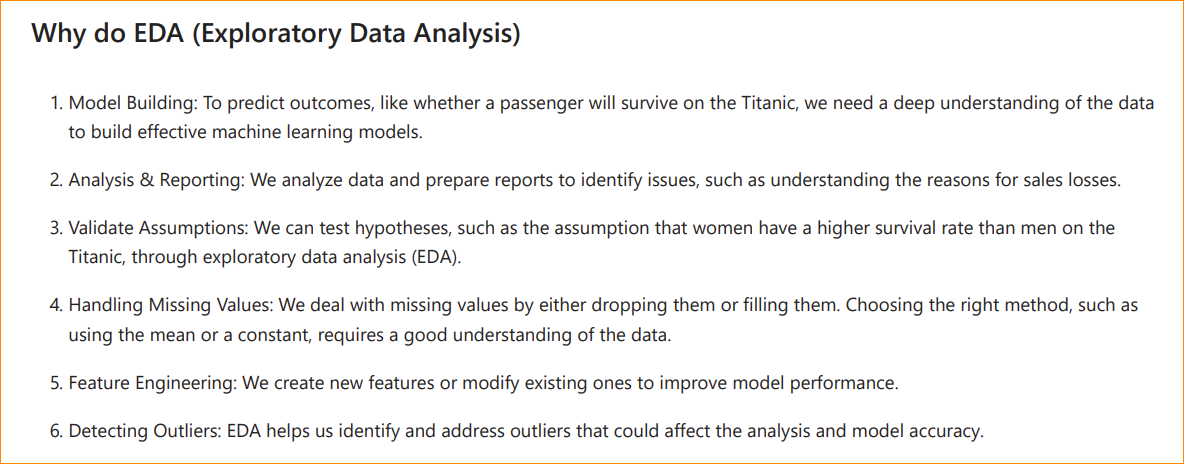

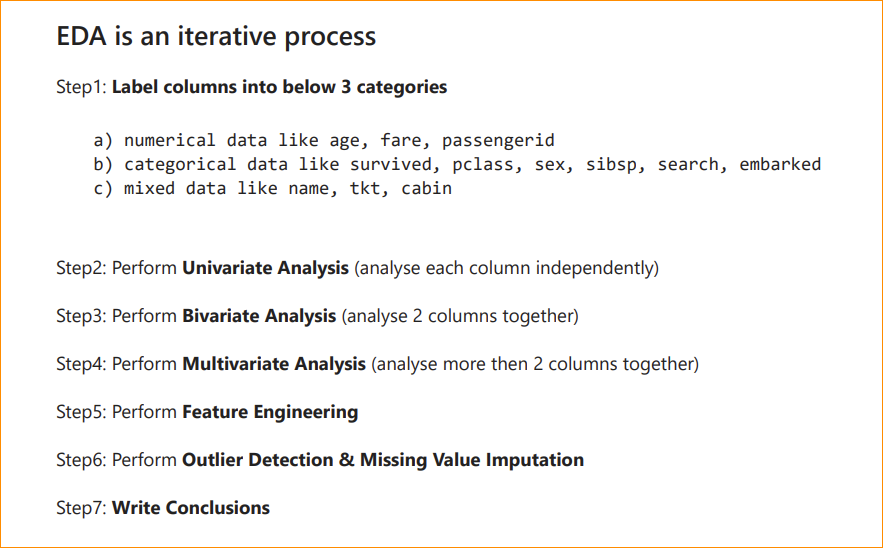

1. Numerical - price, rating, specscore, storagee, cores, ram, screen_size, warranty
2. Categprical - brand, processor, os, graphics, storage_type, ram_type, graphics_category, resolution_category
3. Mixed - None

- we have kept the uneccasry columns for refcheck only, we'll drop them later

In [4]:
df.sample(3)

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics,storage_type,ram_type,resolution,graphics_category,resolution_category
611,Acer Aspire 5 A515-57 Laptop (12th Gen Core i5...,43990,4.00,60,"['12th Gen Intel Core i5 1235U', '10 Cores (2P...",Acer,Intel Core i5,512,10,8,15.6 inches,12,Windows 11,intel iris xe,SSD,DDR4,1920 x 1080,Intel,Standard HD (16:9)
490,Asus TUF Gaming F15 90NR0GW1-M00F00 Laptop (12...,82990,4.70,60,"['12th Gen Intel Core i7 12700H', '20 Threads'...",Asus,Intel Core i7,1024,No,16,15.6 inches,12,Windows 11,NVIDIA GeForce RTX 3050,SSD,DDR5,1920 x 1080,NVIDIA,Standard HD (16:9)
89,Acer Aspire 3 14 A324-45 Laptop (Intel Core Ce...,19990,4.25,39,"['Intel Celeron N4500', 'Dual Core, 2 Threads'...",Acer,Others,256,No,8,14 inches,12,Windows 11,intel integrated uhd,SSD,LPDDR4X,1366 x 768,Intel,Widescreen or Custom


In [5]:
#univariate analysis of numerical col
def univariate_numerical(df, col, bins):
    # Print descriptive statistics
    print(df[col].describe())
    
    # Set up a figure with subplots for multiple plots
    plt.figure(figsize=(14, 10))
    
    # Histogram
    plt.subplot(2, 2, 1)
    df[col].plot(kind='hist', bins=bins, ax=plt.gca(), color='skyblue', edgecolor='black')
    plt.title('Histogram')
    
    # KDE plot
    plt.subplot(2, 2, 2)
    df[col].plot(kind='kde', ax=plt.gca(), color='orange')
    plt.title('KDE Plot')
    
    # Box plot
    plt.subplot(2, 2, 3)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title('Box Plot')
    
    # Print skewness
    skewness = df[col].skew()
    print(f'Skewness: {skewness:.2f}')
    
    plt.tight_layout()
    plt.show()

    
# find outlier based on box plot
def find_outliers(df, column_name):
    """
    Identify outliers in a DataFrame column using the IQR method.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - column_name (str): The name of the column to analyze.

    Returns:
    - pd.DataFrame: DataFrame containing the outliers.
    """
    # Ensure the column exists in the DataFrame
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")

    # Calculate quartiles and IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    return outliers    


#univariate categorical
def univariate_categorical(df, col):
    """
    Analyzes and visualizes a categorical column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - col (str): The name of the categorical column to analyze.

    Returns:
    - None: Displays plots and prints the number of missing values.
    """
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in the DataFrame.")
    
    # Get value counts
    counts = df[col].value_counts()
    
    # Print value counts
    print("Value Counts:\n", counts)
    
    # Plot bar chart
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    counts.plot(kind='bar', color='skyblue')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Plot pie chart
    plt.subplot(1, 2, 2)
    counts.plot(kind='pie', autopct='%0.1f%%', colors=plt.cm.Paired(range(len(counts))))
    plt.title(f'Pie Chart of {col}')
    
    plt.tight_layout()
    plt.show()
    
    # Print number of missing values
    missing_values = df[col].isnull().sum()
    print(f"Number of missing values in '{col}': {missing_values}")



# display max row & columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)

## univariate analysis

In [6]:
# 1. Numerical - price, rating, specscore, storagee, cores, ram, screen_size, warranty
# 2. Categprical - brand, processor, os, graphics, storage_type, ram_type, graphics_category, resolution_category
# 3. Mixed - None

# - we have kept the uneccasry columns for refcheck only, we'll drop them later

count      1018.000000
mean      86179.878193
std       65015.966847
min       10990.000000
25%       47990.000000
50%       66990.000000
75%      102996.750000
max      549990.000000
Name: price, dtype: float64
Skewness: 2.52


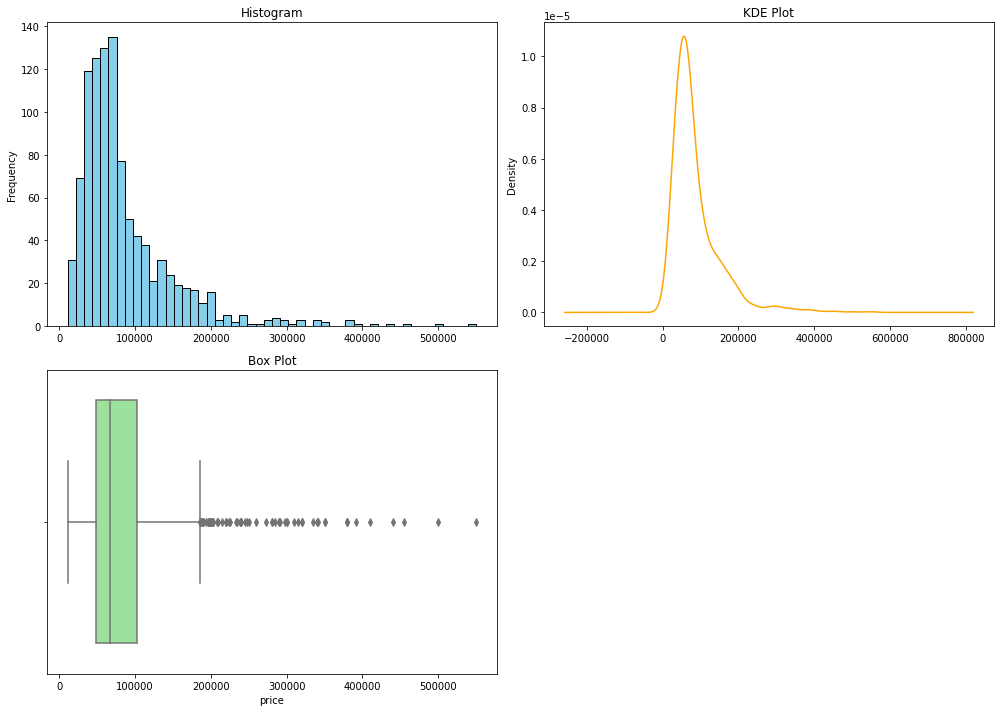

In [7]:
univariate_numerical(df, 'price', 50)

In [8]:
find_outliers(df, 'price')

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics,storage_type,ram_type,resolution,graphics_category,resolution_category
26,MSI Crosshair 16 HX D14VGKG-205IN Gaming Laptop (14th Gen Core i7/ 32GB/ 1TB SSD/ Win11 Home/ 8GB RTX4070),189990,4.50,83,"['14th Gen Intel Core i7 14700HX', '20 Cores (8P + 12E), 28 Threads', '32\u2009GB DDR5 RAM', '1\u2009TB SSD', '8\u2009GB NVIDIA GeForce RTX 4070', '16\u2009inches, 2560\u2009x\u20091440\u2009pixels', 'Windows 11 OS', '2 Year Warranty']",MSI,Intel Core i7,1024,20,32,16 inches,24,Windows 11,NVIDIA GeForce RTX 4070,SSD,DDR5,2560 x 1440,NVIDIA,Quad HD or higher
67,Asus ProArt P16 2024 Laptop (AMD Ryzen AI 9 HX 370/ 32GB/1TB SSD/ 8GB RTX 4070 Graphics),199990,4.60,68,"['AMD Ryzen AI 9 HX 370', '32\u2009GB LPDDR5X RAM', '1\u2009TB SSD', '8\u2009GB NVIDIA GeForce RTX 4070', '16\u2009inches, 3840\u2009x\u20092400\u2009pixels', 'Windows 11 OS', '1 Year Warranty', 'Backlit Keyboard']",Asus,AMD Ryzen 9,1024,No,32,16 inches,12,Windows 11,NVIDIA GeForce RTX 4070,SSD,LPDDR5X,3840 x 2400,NVIDIA,Quad HD or higher
79,Apple MacBook Pro 16 2023 Laptop (Apple M3 Max/ 48GB/ 1TB SSD/ macOS),379990,4.65,65,"['Apple M3 Max', '16 Cores (12P + 4E)', '48\u2009GB RAM', '1\u2009TB SSD', '40 Core GPU', '16.2\u2009inches, 3456\u2009x\u20092234\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M Series,1024,16,48,16.2 inches,12,Mac,40 Core GPU,SSD,,3456 x 2234,Other/Unknown,Quad HD or higher
87,MSI Titan 18 HX A14VIG-201IN Gaming Laptop (14th Gen Core i9/ 128GB/ 4TB SSD/ Win11 Home/ 16GB Graphics RTX 4090),549990,4.40,93,"['14th Gen Intel Core i9 14900HX', '24 Cores (8P + 16E), 32 Threads', '128\u2009GB DDR5 RAM', '192\u2009GB Hard Disk', '4\u2009TB SSD', '16\u2009GB NVIDIA GeForce RTX 4090', '18\u2009inches, 3840\u2009x\u20092400\u2009pixels', 'Windows 11 OS']",MSI,Intel Core i9,4096,24,128,18 inches,0,Windows 11,rtx 4090,SSD,DDR5,3840 x 2400,NVIDIA,Quad HD or higher
114,Apple MacBook Pro 16 2023 Laptop (Apple M3 Max/ 48GB/ 1TB SSD/ macOS),379990,4.65,65,"['Apple M3 Max', '16 Cores (12P + 4E)', '48\u2009GB RAM', '1\u2009TB SSD', '40 Core GPU', '16.2\u2009inches, 3456\u2009x\u20092234\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M Series,1024,16,48,16.2 inches,12,Mac,40 Core GPU,SSD,,3456 x 2234,Other/Unknown,Quad HD or higher
154,Apple MacBook Pro 16 2023 Laptop (Apple M3 Max/ 48GB/ 1TB SSD/ macOS),379990,4.65,65,"['Apple M3 Max', '16 Cores (12P + 4E)', '48\u2009GB RAM', '1\u2009TB SSD', '40 Core GPU', '16.2\u2009inches, 3456\u2009x\u20092234\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M Series,1024,16,48,16.2 inches,12,Mac,40 Core GPU,SSD,,3456 x 2234,Other/Unknown,Quad HD or higher
167,MSI Stealth 17 A13VH-055IN Gaming Laptop (13th Gen Core i9/ 64GB/ 2TB SSD/ Win11 Home/ 12GB Graph),439990,4.70,98,"['13th Gen Intel Core i9 13900H', '14 Cores (6P + 8E), 20 Threads', '64\u2009GB DDR5 RAM', '2\u2009TB SSD', '12\u2009GB Nvidia GeForce RTX4080', '17.3\u2009inches, 3840\u2009x\u20092160\u2009pixels', 'Windows 11 OS', '2 Year Warranty']",MSI,Intel Core i9,2048,14,64,17.3 inches,24,Windows 11,NVIDIA,SSD,DDR5,3840 x 2160,Other/Unknown,Quad HD or higher
189,Lenovo Legion 7 16IRX9 83FD000XIN Gaming Laptop (14th Gen Core i9/ 32GB/ 1TB SSD/ Win11/ 8GB RTX 4070 Graph),208490,4.70,89,"['14th Gen Intel Core i9 14900HX', '24 Cores (8P + 16E), 32 Threads', '32\u2009GB DDR5 RAM', '1\u2009TB SSD', '8\u2009GB NVIDIA GeForce RTX 4070', '16\u2009inches, 3200\u2009x\u20092000\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Lenovo,Intel Core i9,1024,24,32,16 inches,12,Windows 11,NVIDIA GeForce RTX 4070,SSD,DDR5,3200 x 2000,NVIDIA,Quad HD or higher
232,Apple MacBook Pro 14 2023 Laptop (Apple M3 Pro/ 18GB/ 512GB SSD/ macOS),186899,4.75,54,"['Apple M3 Pro', '11 Cores (5P + 6E)', '18\u2009GB RAM', '512\u2009GB SSD', '14 Core GPU', '14.2\u2009inches, 3024\u2009x\u20091964\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M Series,512,11,18,14.2

### conclusion - price: outliers in data, right skewed

count    1018.000000
mean        4.375688
std         0.235443
min         3.850000
25%         4.200000
50%         4.400000
75%         4.600000
max         4.750000
Name: rating, dtype: float64
Skewness: -0.01


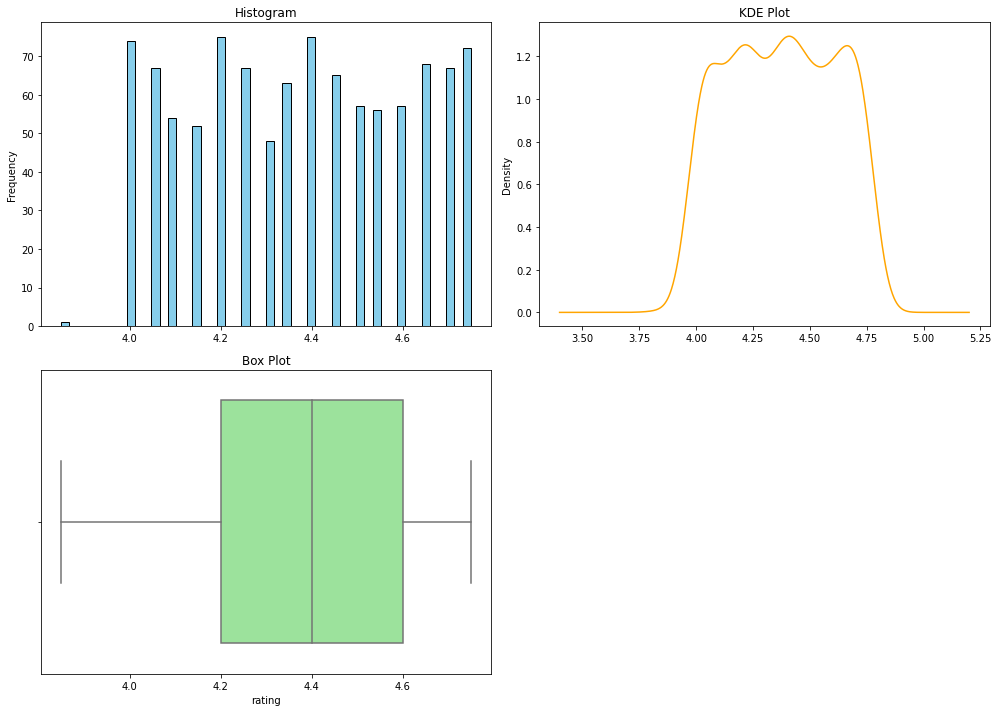

In [9]:
univariate_numerical(df, 'rating', 50)

### conclusion - rating: no outliers in data, approx normally distributed

count    1018.000000
mean       61.155206
std        11.171915
min        19.000000
25%        54.000000
50%        61.000000
75%        68.000000
max        98.000000
Name: specScore, dtype: float64
Skewness: -0.01


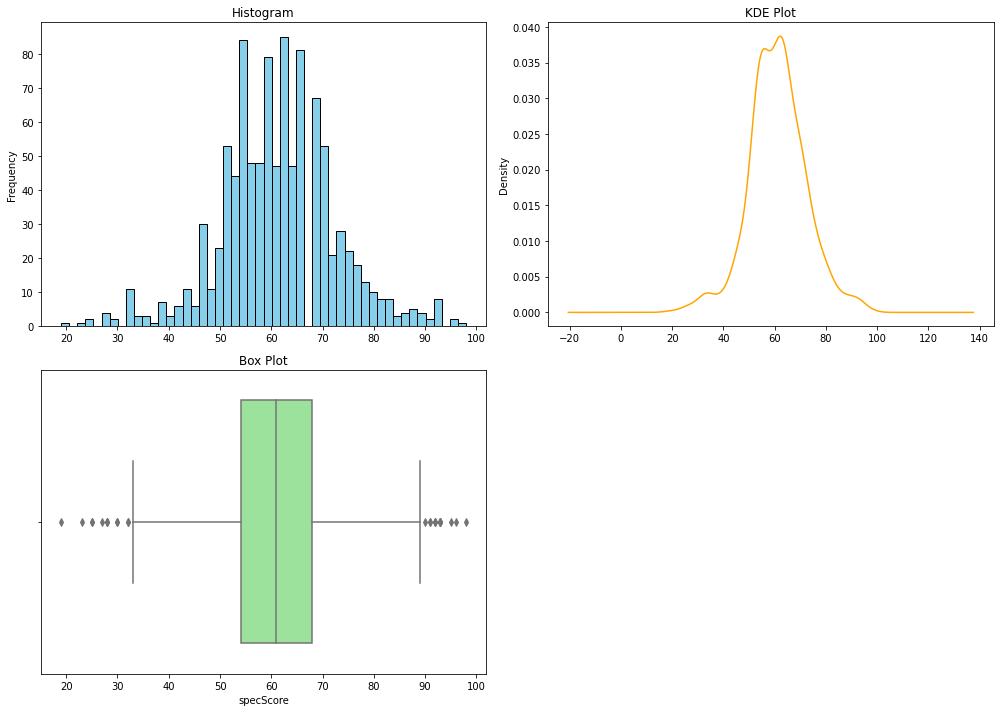

In [10]:
univariate_numerical(df, 'specScore', 50)

In [11]:
find_outliers(df, 'specScore')

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics,storage_type,ram_type,resolution,graphics_category,resolution_category
74,HP Chromebook 11MK G9 EE Laptop (MediaTek MT8183/ 4GB/ 32GB eMMC/ Chrome OS),10990,4.75,28,"['MediaTek Kompanio 500 500', 'Octa Core', '4\u2009GB LPDDR4X RAM', '32\u2009GB Hard Disk', 'Arm Mali-G72 MP3', '11.6\u2009inches, 1366\u2009x\u2009768\u2009pixels', 'Chrome OS', '1 Year Warranty']",HP,Others,32,No,4,11.6 inches,12,Chrome,Arm Mali-G72 MP3,hard disk,LPDDR4X,1366 x 768,Other/Unknown,Widescreen or Custom
87,MSI Titan 18 HX A14VIG-201IN Gaming Laptop (14th Gen Core i9/ 128GB/ 4TB SSD/ Win11 Home/ 16GB Graphics RTX 4090),549990,4.40,93,"['14th Gen Intel Core i9 14900HX', '24 Cores (8P + 16E), 32 Threads', '128\u2009GB DDR5 RAM', '192\u2009GB Hard Disk', '4\u2009TB SSD', '16\u2009GB NVIDIA GeForce RTX 4090', '18\u2009inches, 3840\u2009x\u20092400\u2009pixels', 'Windows 11 OS']",MSI,Intel Core i9,4096,24,128,18 inches,0,Windows 11,rtx 4090,SSD,DDR5,3840 x 2400,NVIDIA,Quad HD or higher
106,HP Chromebook 11MK G9 EE Laptop (MediaTek MT8183/ 4GB/ 32GB eMMC/ Chrome OS),10990,4.75,28,"['MediaTek Kompanio 500 500', 'Octa Core', '4\u2009GB LPDDR4X RAM', '32\u2009GB Hard Disk', 'Arm Mali-G72 MP3', '11.6\u2009inches, 1366\u2009x\u2009768\u2009pixels', 'Chrome OS', '1 Year Warranty']",HP,Others,32,No,4,11.6 inches,12,Chrome,Arm Mali-G72 MP3,hard disk,LPDDR4X,1366 x 768,Other/Unknown,Widescreen or Custom
167,MSI Stealth 17 A13VH-055IN Gaming Laptop (13th Gen Core i9/ 64GB/ 2TB SSD/ Win11 Home/ 12GB Graph),439990,4.70,98,"['13th Gen Intel Core i9 13900H', '14 Cores (6P + 8E), 20 Threads', '64\u2009GB DDR5 RAM', '2\u2009TB SSD', '12\u2009GB Nvidia GeForce RTX4080', '17.3\u2009inches, 3840\u2009x\u20092160\u2009pixels', 'Windows 11 OS', '2 Year Warranty']",MSI,Intel Core i9,2048,14,64,17.3 inches,24,Windows 11,NVIDIA,SSD,DDR5,3840 x 2160,Other/Unknown,Quad HD or higher
285,Primebook PBMTWIFI11064 Wi-Fi Laptop (MediaTek MT8183/ 4GB/ 64B eMMC/ Prime OS),10990,4.25,30,"['MediaTek MT8183', 'Octa Core', '4\u2009GB LPDDR4 RAM', '64\u2009GB Hard Disk', 'ARM Mali G72', '11.6\u2009inches, 1366\u2009x\u2009768\u2009pixels', '1 Year Warranty', '2 USB 3.0 Ports']",Other,Others,64,No,4,11.6 inches,12,No,ARM Mali G72,hard disk,LPDDR4,1366 x 768,Qualcomm and ARM,Widescreen or Custom
375,MSI Titan 18 HX A14VHG-207IN Gaming Laptop (14th Gen Core i9/ 64GB/ 2TB SSD/ Win11 Home/ RTX 4080),409990,4.70,96,"['14th Gen Intel Core i9 14900HX', '24 Cores (8P + 16E), 32 Threads', '64\u2009GB DDR5 RAM', '2\u2009TB SSD', '12\u2009GB NVIDIA GeForce RTX 4080', '18\u2009inches, 3840\u2009x\u20092400\u2009pixels', 'Windows 11 OS', '2 Year Warranty']",MSI,Intel Core i9,2048,24,64,18 inches,24,Windows 11,rtx 4080,SSD,DDR5,3840 x 2400,NVIDIA,Quad HD or higher
433,MSI Vector 17 HX A14VHG-806IN Gaming Laptop (14th Gen Core i9/ 32GB/ 2TB SSD/ Win11 Home/ 12GB Graph),279990,4.50,92,"['14th Gen Intel Core i9 14900HX', '24 Cores (8P + 16E), 32 Threads', '32\u2009GB DDR5 RAM', '2\u2009TB SSD', '12\u2009GB NVIDIA GeForce RTX 4080', '17\u2009inches, 2560\u2009x\u20091600\u2009pixels', 'Windows 11 OS', '2 Year Warranty']",MSI,Intel Core i9,2048,24,32,17 inches,24,Windows 11,rtx 4080,SSD,DDR5,2560 x 1600,NVIDIA,Quad HD or higher
444,Lenovo Ideapad Slim 3 Chrome 14M868 82XJ002LHA Laptop (MediaTek Kompanio 520/ 4GB/ 128GB eMMC/ Chrome OS),19990,4.65,28,"['MediaTek Kompanio 520 Kompanio 520', 'Octa Core', '4\u2009GB LPDDR4X RAM', '128\u2009GB Hard Disk', 'Arm Mali G52 MC2 2EE Graphics', '14\u2009inches, 1366\u2009x\u2009768\u2009pixels', 'Chrome OS', '1 Year Warranty']",Lenovo,Others,128,No,4,14 inches,12,Chrome,Arm Mali G52 MC2 2EE Graphics,hard disk,LPDDR4X,1366 x 768,Other/Unknown,Widescreen or Custom
474,Primebook S Wi-Fi Laptop (MediaTek MT8183/ 4GB/ 128GB eMMC/ Prime OS),13490,4.15,30,"['MediaTek MT8183', 'Octa Core', '4\u2009GB LPDDR4 RAM', '128\u2009GB Hard Disk', 'ARM Mali G72', '11.6\u2009inches, 1

### conclusion - specScore: outliers in data, normally distributed

count    1018.000000
mean      668.636542
std       348.295701
min         8.000000
25%       512.000000
50%       512.000000
75%      1024.000000
max      4096.000000
Name: storage, dtype: float64
Skewness: 2.24


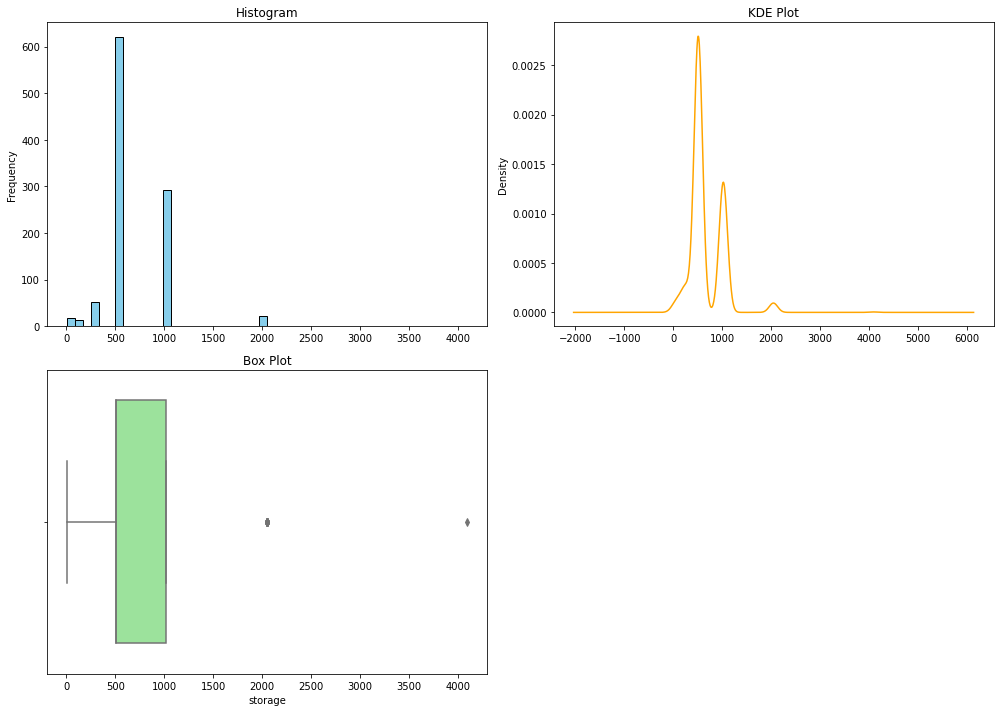

In [12]:
univariate_numerical(df, 'storage', 50)

In [13]:
find_outliers(df, 'storage')

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics,storage_type,ram_type,resolution,graphics_category,resolution_category
87,MSI Titan 18 HX A14VIG-201IN Gaming Laptop (14th Gen Core i9/ 128GB/ 4TB SSD/ Win11 Home/ 16GB Graphics RTX 4090),549990,4.40,93,"['14th Gen Intel Core i9 14900HX', '24 Cores (8P + 16E), 32 Threads', '128\u2009GB DDR5 RAM', '192\u2009GB Hard Disk', '4\u2009TB SSD', '16\u2009GB NVIDIA GeForce RTX 4090', '18\u2009inches, 3840\u2009x\u20092400\u2009pixels', 'Windows 11 OS']",MSI,Intel Core i9,4096,24,128,18 inches,0,Windows 11,rtx 4090,SSD,DDR5,3840 x 2400,NVIDIA,Quad HD or higher
167,MSI Stealth 17 A13VH-055IN Gaming Laptop (13th Gen Core i9/ 64GB/ 2TB SSD/ Win11 Home/ 12GB Graph),439990,4.70,98,"['13th Gen Intel Core i9 13900H', '14 Cores (6P + 8E), 20 Threads', '64\u2009GB DDR5 RAM', '2\u2009TB SSD', '12\u2009GB Nvidia GeForce RTX4080', '17.3\u2009inches, 3840\u2009x\u20092160\u2009pixels', 'Windows 11 OS', '2 Year Warranty']",MSI,Intel Core i9,2048,14,64,17.3 inches,24,Windows 11,NVIDIA,SSD,DDR5,3840 x 2160,Other/Unknown,Quad HD or higher
375,MSI Titan 18 HX A14VHG-207IN Gaming Laptop (14th Gen Core i9/ 64GB/ 2TB SSD/ Win11 Home/ RTX 4080),409990,4.70,96,"['14th Gen Intel Core i9 14900HX', '24 Cores (8P + 16E), 32 Threads', '64\u2009GB DDR5 RAM', '2\u2009TB SSD', '12\u2009GB NVIDIA GeForce RTX 4080', '18\u2009inches, 3840\u2009x\u20092400\u2009pixels', 'Windows 11 OS', '2 Year Warranty']",MSI,Intel Core i9,2048,24,64,18 inches,24,Windows 11,rtx 4080,SSD,DDR5,3840 x 2400,NVIDIA,Quad HD or higher
413,Huawei MateBook X Pro 2024 Laptop (Intel Core Ultra 9 185H/ 32GB/ 2TB SSD/ Win11 Home),188990,4.55,74,"['Intel Core Ultra 9 Series 1 185H', '16 Cores (6P + 8E + 2LP-E), 22 Threads', '32\u2009GB RAM', '2\u2009TB SSD', 'Intel Arc Graphics', '14.2\u2009inches, 3120\u2009x\u20092080\u2009pixels, Touch Screen', 'Windows 11 OS', '1 Year Warranty']",Other,Intel Core Ultra,2048,16,32,14.2 inches,12,Windows 11,intel arc graphics,SSD,,3120 x 2080,Intel,Quad HD or higher
433,MSI Vector 17 HX A14VHG-806IN Gaming Laptop (14th Gen Core i9/ 32GB/ 2TB SSD/ Win11 Home/ 12GB Graph),279990,4.50,92,"['14th Gen Intel Core i9 14900HX', '24 Cores (8P + 16E), 32 Threads', '32\u2009GB DDR5 RAM', '2\u2009TB SSD', '12\u2009GB NVIDIA GeForce RTX 4080', '17\u2009inches, 2560\u2009x\u20091600\u2009pixels', 'Windows 11 OS', '2 Year Warranty']",MSI,Intel Core i9,2048,24,32,17 inches,24,Windows 11,rtx 4080,SSD,DDR5,2560 x 1600,NVIDIA,Quad HD or higher
507,Dell Alienware X16 Gaming Laptop (13th Gen Core i9/ 32GB/ 2TB SSD/ Win 11/ 16GB Graph),454290,4.35,84,"['13th Gen Intel Core i9 13900HK', '14 Cores (6P + 8E), 20 Threads', '32\u2009GB LPDDR5 RAM', '2\u2009TB SSD', '16\u2009GB NVIDIA GeForce RTX 4090', '16\u2009inches, 3200\u2009x\u20091800\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Dell,Intel Core i9,2048,14,32,16 inches,12,Windows 11,rtx 4090,SSD,LPDDR5,3200 x 1800,NVIDIA,Quad HD or higher
509,Dell Alienware m16 Gaming Laptop (AMD Ryzen 9 7845HX/ 32GB/ 2TB SSD/ Win 11/ 12GB Graph),289990,4.70,91,"['7th Gen Amd Ryzen 9 7845HX', '12 Cores, 24 Threads', '32\u2009GB DDR5 RAM', '2\u2009TB SSD', '12\u2009GB NVIDIA GEFORCE RTX 4080', '16\u2009inches, 1920\u2009x\u20091200\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Dell,AMD Ryzen 9,2048,12,32,16 inches,12,Windows 11,rtx 4080,SSD,DDR5,1920 x 1200,NVIDIA,Widescreen (16:10)
635,Asus ROG Zephyrus M16 GU603ZX-K8024WS Laptop (12th Gen Core i9/ 32GB/ 2TB SSD/ Win11 Home/ 16GB Graph),199990,4.05,83,"['12th Gen Intel Core i9 12900H', '14 Cores (6P + 8E), 20 Threads', '32\u2009GB DDR5 RAM', '2\u2009TB SSD', '16\u2009GB NVIDIA GeForce RTX 3080 Ti', '16\u2009inches, 2560\u2009x\u20091600\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Asus,Others,2048,14,32,16 inches,12,Windows 11,NVIDIA,SSD,DDR5,2560 x 1600,Other/Unknown,Quad HD or higher
650,Apple MacBook Pro 16 Laptop (9th Gen Core i9/ 32GB/ 2TB SSD/ MacOS/ 4GB Graph),201498,4.

### conclusion - storage: outliers in data, data not normally distributed

In [14]:
# df[df['cores'] == "No"]

## cores needs to be re cleaned

In [15]:
df['ram'] = df['ram'].str.strip().astype(int)

count    1018.000000
mean       15.223969
std         8.232065
min         4.000000
25%         8.000000
50%        16.000000
75%        16.000000
max       128.000000
Name: ram, dtype: float64
Skewness: 4.04


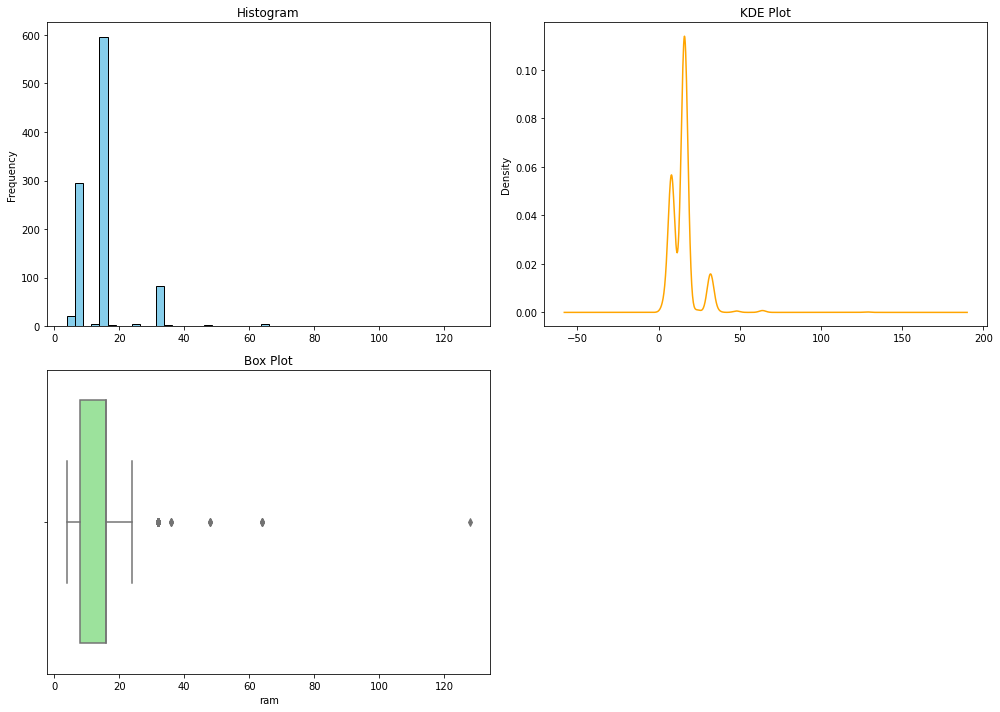

In [16]:
univariate_numerical(df, 'ram', 50)

In [17]:
find_outliers(df, 'ram')

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics,storage_type,ram_type,resolution,graphics_category,resolution_category
26,MSI Crosshair 16 HX D14VGKG-205IN Gaming Laptop (14th Gen Core i7/ 32GB/ 1TB SSD/ Win11 Home/ 8GB RTX4070),189990,4.50,83,"['14th Gen Intel Core i7 14700HX', '20 Cores (8P + 12E), 28 Threads', '32\u2009GB DDR5 RAM', '1\u2009TB SSD', '8\u2009GB NVIDIA GeForce RTX 4070', '16\u2009inches, 2560\u2009x\u20091440\u2009pixels', 'Windows 11 OS', '2 Year Warranty']",MSI,Intel Core i7,1024,20,32,16 inches,24,Windows 11,NVIDIA GeForce RTX 4070,SSD,DDR5,2560 x 1440,NVIDIA,Quad HD or higher
33,Infinix Zerobook 2023 Laptop (13th Gen Core i9/ 32GB/ 1TB SSD/ Win 11 Home),64990,4.05,68,"['13th Gen Intel Core i9 13900H', '14 Cores (6P + 8E), 20 Threads', '32\u2009GB LPDDR5X RAM', '1\u2009TB SSD', 'Intel Integrated Iris Xe', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Infinix,Intel Core i9,1024,14,32,15.6 inches,12,Windows 11,intel integrated iris xe,SSD,LPDDR5X,1920 x 1080,Intel,Standard HD (16:9)
61,Asus Tianxuan Air 2024 Gaming Laptop (Ryzen AI 9 HX 370/ 32GB/ 1TB SSD/ 6GB RTX 4060),109670,4.25,47,"['AMD Ryzen AI 9', '32\u2009GB RAM', '1\u2009TB SSD', '8\u2009GB NVIDIA GeForce RTX 4060', '14\u2009inches, 2560\u2009x\u20091600\u2009pixels', 'Windows 11 OS', '1 Year Warranty', 'Backlit Keyboard']",Asus,AMD Ryzen 9,1024,No,32,14 inches,12,Windows 11,rtx 4060,SSD,,2560 x 1600,NVIDIA,Quad HD or higher
67,Asus ProArt P16 2024 Laptop (AMD Ryzen AI 9 HX 370/ 32GB/1TB SSD/ 8GB RTX 4070 Graphics),199990,4.60,68,"['AMD Ryzen AI 9 HX 370', '32\u2009GB LPDDR5X RAM', '1\u2009TB SSD', '8\u2009GB NVIDIA GeForce RTX 4070', '16\u2009inches, 3840\u2009x\u20092400\u2009pixels', 'Windows 11 OS', '1 Year Warranty', 'Backlit Keyboard']",Asus,AMD Ryzen 9,1024,No,32,16 inches,12,Windows 11,NVIDIA GeForce RTX 4070,SSD,LPDDR5X,3840 x 2400,NVIDIA,Quad HD or higher
79,Apple MacBook Pro 16 2023 Laptop (Apple M3 Max/ 48GB/ 1TB SSD/ macOS),379990,4.65,65,"['Apple M3 Max', '16 Cores (12P + 4E)', '48\u2009GB RAM', '1\u2009TB SSD', '40 Core GPU', '16.2\u2009inches, 3456\u2009x\u20092234\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M Series,1024,16,48,16.2 inches,12,Mac,40 Core GPU,SSD,,3456 x 2234,Other/Unknown,Quad HD or higher
87,MSI Titan 18 HX A14VIG-201IN Gaming Laptop (14th Gen Core i9/ 128GB/ 4TB SSD/ Win11 Home/ 16GB Graphics RTX 4090),549990,4.40,93,"['14th Gen Intel Core i9 14900HX', '24 Cores (8P + 16E), 32 Threads', '128\u2009GB DDR5 RAM', '192\u2009GB Hard Disk', '4\u2009TB SSD', '16\u2009GB NVIDIA GeForce RTX 4090', '18\u2009inches, 3840\u2009x\u20092400\u2009pixels', 'Windows 11 OS']",MSI,Intel Core i9,4096,24,128,18 inches,0,Windows 11,rtx 4090,SSD,DDR5,3840 x 2400,NVIDIA,Quad HD or higher
88,Asus Tianxuan Air 2024 Gaming Laptop (Ryzen AI 9 HX 370/ 32GB/ 1TB SSD/ 6GB RTX 4060),109670,4.25,47,"['AMD Ryzen AI 9', '32\u2009GB RAM', '1\u2009TB SSD', '8\u2009GB NVIDIA GeForce RTX 4060', '14\u2009inches, 2560\u2009x\u20091600\u2009pixels', 'Windows 11 OS', '1 Year Warranty', 'Backlit Keyboard']",Asus,AMD Ryzen 9,1024,No,32,14 inches,12,Windows 11,rtx 4060,SSD,,2560 x 1600,NVIDIA,Quad HD or higher
90,Infinix Zero Book Ultra AI PC ZL514 Laptop (Intel Core Ultra 9 185H/ 32GB/ 1TB SSD/ Win 11 Home),84990,4.70,65,"['Intel Core Ultra 9 Series 1 185H', '16 Cores (6P + 8E + 2LP-E), 22 Threads', '32\u2009GB LPDDR5X RAM', '1\u2009TB SSD', 'Intel Integrated Intel Arc', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Infinix,Intel Core Ultra,1024,16,32,15.6 inches,12,Windows 11,intel integrated,SSD,LPDDR5X,1920 x 1080,Intel,Standard HD (16:9)
114,Apple MacBook Pro 16 2023 Laptop (Apple M3 Max/ 48GB/ 1TB SSD/ macOS),379990,4.65,65,"['Apple M3 Max', '16 Cores (12P + 4E)', '48\u2009GB RAM', '1\u2009TB SSD', '40 Core GPU', '16.2\u2009inches, 3456\u2009x\u20092234\u2009pixels', 'Mac OS', '1 Year Warr

### conclusion - ram: outliers in data, data left skewed

In [18]:
df['screen_size'] = df['screen_size'].str.replace("inches","").str.strip().astype(float)

count    1018.000000
mean       15.159774
std         0.986410
min        11.600000
25%        14.000000
50%        15.600000
75%        15.600000
max        18.000000
Name: screen_size, dtype: float64
Skewness: -0.70


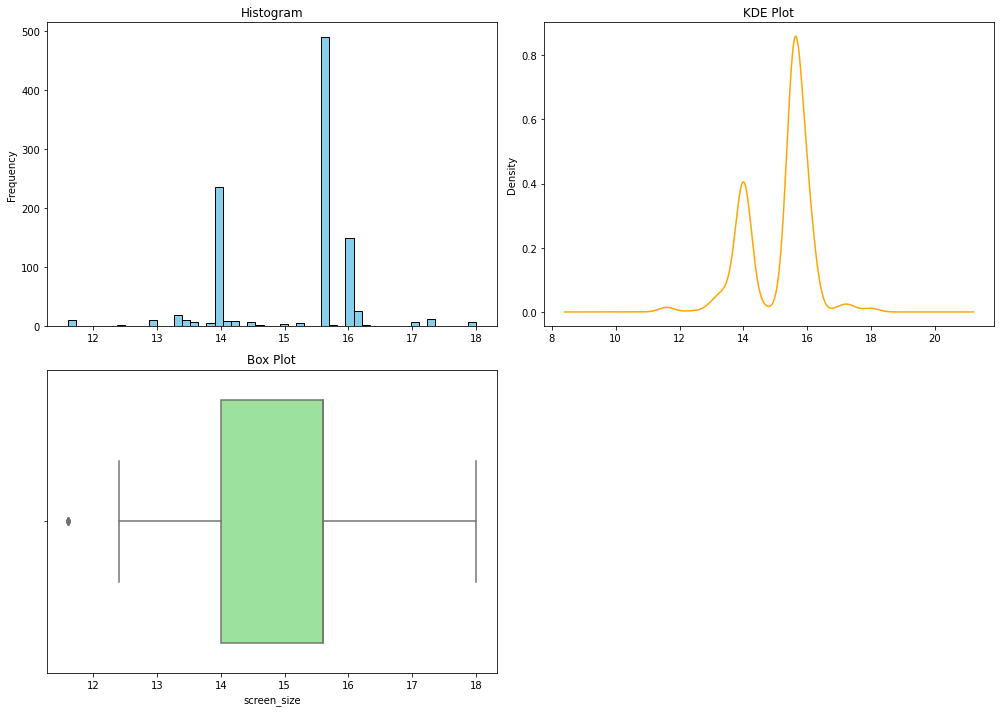

In [19]:
univariate_numerical(df, 'screen_size', 50)

In [20]:
find_outliers(df, 'screen_size')

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics,storage_type,ram_type,resolution,graphics_category,resolution_category
74,HP Chromebook 11MK G9 EE Laptop (MediaTek MT8183/ 4GB/ 32GB eMMC/ Chrome OS),10990,4.75,28,"['MediaTek Kompanio 500 500', 'Octa Core', '4\u2009GB LPDDR4X RAM', '32\u2009GB Hard Disk', 'Arm Mali-G72 MP3', '11.6\u2009inches, 1366\u2009x\u2009768\u2009pixels', 'Chrome OS', '1 Year Warranty']",HP,Others,32,No,4,11.6,12,Chrome,Arm Mali-G72 MP3,hard disk,LPDDR4X,1366 x 768,Other/Unknown,Widescreen or Custom
106,HP Chromebook 11MK G9 EE Laptop (MediaTek MT8183/ 4GB/ 32GB eMMC/ Chrome OS),10990,4.75,28,"['MediaTek Kompanio 500 500', 'Octa Core', '4\u2009GB LPDDR4X RAM', '32\u2009GB Hard Disk', 'Arm Mali-G72 MP3', '11.6\u2009inches, 1366\u2009x\u2009768\u2009pixels', 'Chrome OS', '1 Year Warranty']",HP,Others,32,No,4,11.6,12,Chrome,Arm Mali-G72 MP3,hard disk,LPDDR4X,1366 x 768,Other/Unknown,Widescreen or Custom
285,Primebook PBMTWIFI11064 Wi-Fi Laptop (MediaTek MT8183/ 4GB/ 64B eMMC/ Prime OS),10990,4.25,30,"['MediaTek MT8183', 'Octa Core', '4\u2009GB LPDDR4 RAM', '64\u2009GB Hard Disk', 'ARM Mali G72', '11.6\u2009inches, 1366\u2009x\u2009768\u2009pixels', '1 Year Warranty', '2 USB 3.0 Ports']",Other,Others,64,No,4,11.6,12,No,ARM Mali G72,hard disk,LPDDR4,1366 x 768,Qualcomm and ARM,Widescreen or Custom
466,Acer One 11 Z8-284 UN.013SI.032 Laptop ( Intel Celeron N4500/ 8GB/ 256GB SSD/ Win11 Home),18990,4.45,42,"['Intel Celeron N4500', 'Dual Core, 2 Threads', '8\u2009GB DDR4 RAM', '256\u2009GB SSD', 'Intel Integrated UHD', '11.6\u2009inches, 1366\u2009x\u2009768\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Acer,Others,256,No,8,11.6,12,Windows 11,intel integrated uhd,SSD,DDR4,1366 x 768,Intel,Widescreen or Custom
474,Primebook S Wi-Fi Laptop (MediaTek MT8183/ 4GB/ 128GB eMMC/ Prime OS),13490,4.15,30,"['MediaTek MT8183', 'Octa Core', '4\u2009GB LPDDR4 RAM', '128\u2009GB Hard Disk', 'ARM Mali G72', '11.6\u2009inches, 1366\u2009x\u2009768\u2009pixels', '1 Year Warranty', '2 USB 3.0 Ports']",Other,Others,128,No,4,11.6,12,No,ARM Mali G72,hard disk,LPDDR4,1366 x 768,Qualcomm and ARM,Widescreen or Custom
577,Primebook 4G Android Laptop (MediaTek MT8788/ 4GB/ 64GB eMMC/ Android 11),14990,4.75,25,"['MediaTek MTK8788', 'Octa Core', '4\u2009GB LPDDR4 RAM', '64\u2009GB Hard Disk', 'ARM Mali G72', '11.6\u2009inches, 1366\u2009x\u2009768\u2009pixels', 'Android 11 OS', '1 Year Warranty']",Other,Others,64,No,4,11.6,12,Android 11,ARM Mali G72,hard disk,LPDDR4,1366 x 768,Qualcomm and ARM,Widescreen or Custom
607,Primebook 4G Android Laptop (MediaTek MT8788/ 4GB/ 64GB eMMC/ Android 11),14990,4.75,25,"['MediaTek MTK8788', 'Octa Core', '4\u2009GB LPDDR4 RAM', '64\u2009GB Hard Disk', 'ARM Mali G72', '11.6\u2009inches, 1366\u2009x\u2009768\u2009pixels', 'Android 11 OS', '1 Year Warranty']",Other,Others,64,No,4,11.6,12,Android 11,ARM Mali G72,hard disk,LPDDR4,1366 x 768,Qualcomm and ARM,Widescreen or Custom
839,HP Chromebook 11MK G9 EE Touch Laptop (MediaTek MT8183/ 4GB/ 32GB eMMC/ Chrome OS),21990,4.35,33,"['MediaTek Kompanio 500 500', 'Octa Core', '4\u2009GB LPDDR4X RAM', '32\u2009GB Hard Disk', 'Arm Mali-G72 MP3', '11.6\u2009inches, 1366\u2009x\u2009768\u2009pixels, Touch Screen', 'Chrome OS', '1 Year Warranty']",HP,Others,32,No,4,11.6,12,Chrome,Arm Mali-G72 MP3,hard disk,LPDDR4X,1366 x 768,Other/Unknown,Widescreen or Custom
980,Jio JioBook Cloud Laptop (Octa Core/ 4GB/ 64GB eMMC/ JioOS),14999,4.15,19,"['Octa Core', '4\u2009GB \u200eLPDDR4 RAM', '64\u2009GB Hard Disk', '11.6\u2009inches, 1366\u2009x\u2009768\u2009pixels', '1 Year Warranty']",Other,Others,64,No,4,11.6,12,No,Not available,hard disk,LPDDR4,1366 x 768,Other/Unknown,Widescreen or Custom


### conclusion - screen_size: outliers in data, normally distributed

count    1018.000000
mean       13.144401
std         4.283440
min         0.000000
25%        12.000000
50%        12.000000
75%        12.000000
max        36.000000
Name: Warranty, dtype: float64
Skewness: 2.32


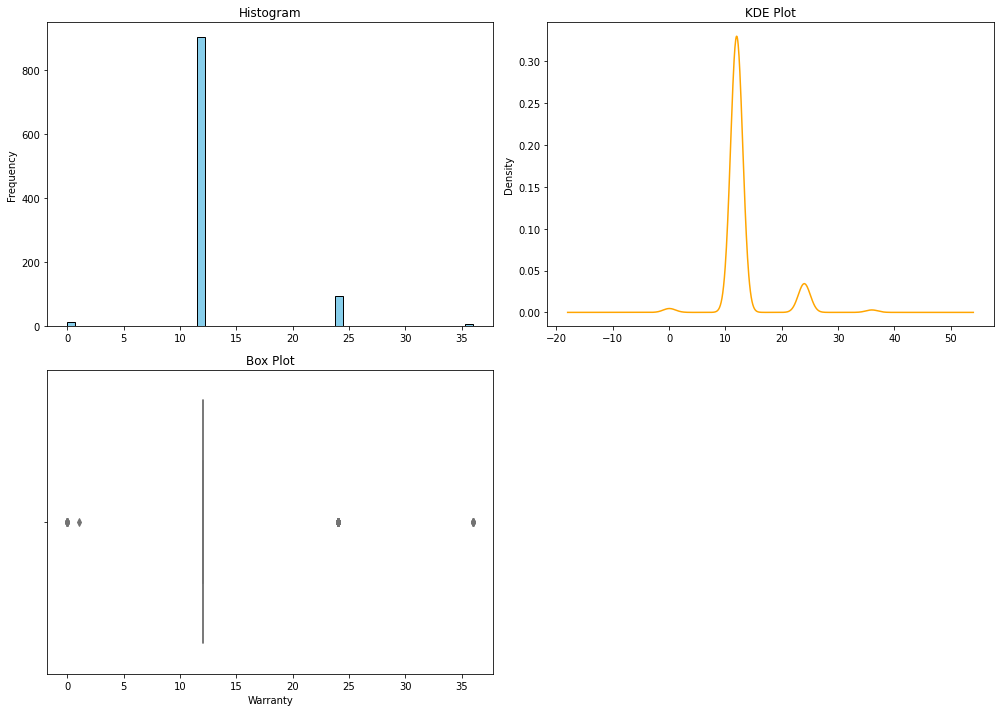

In [21]:
univariate_numerical(df, 'Warranty', 50)

### conclusion - warranty: outliers in data, not normal 

In [22]:
df.columns

Index(['productName', 'price', 'rating', 'specScore', 'features', 'brand',
       'processor', 'storage', 'cores', 'ram', 'screen_size', 'Warranty', 'OS',
       'graphics', 'storage_type', 'ram_type', 'resolution',
       'graphics_category', 'resolution_category'],
      dtype='object')

Value Counts:
 Standard HD (16:9)      595
Quad HD or higher       208
Widescreen (16:10)      137
Widescreen or Custom     67
Other                    11
Name: resolution_category, dtype: int64


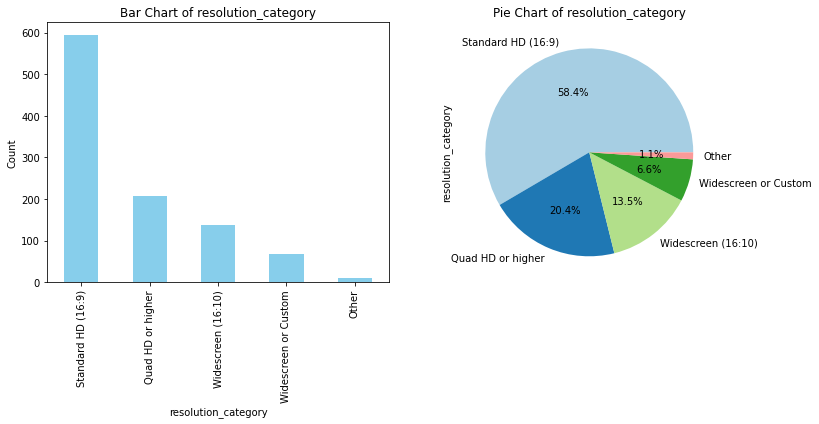

Number of missing values in 'resolution_category': 0


In [23]:
univariate_categorical(df, 'resolution_category')

### I have checked all categorical using the same function, we need to fix cores col

In [24]:
df['cores'].value_counts()

No     507
10     199
16      93
12      89
14      81
24      31
20      12
5        5
11       1
Name: cores, dtype: int64

In [25]:
df[df['cores'] == "No"]

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics,storage_type,ram_type,resolution,graphics_category,resolution_category


In [26]:
##this cores seems to be conflicting column with processor which is also dual core, octa core, & this is cores & some threads, not able to understand what that?
##as per chatgpt also, its related to the same thing so we can exclude them for now

## Bi-variate

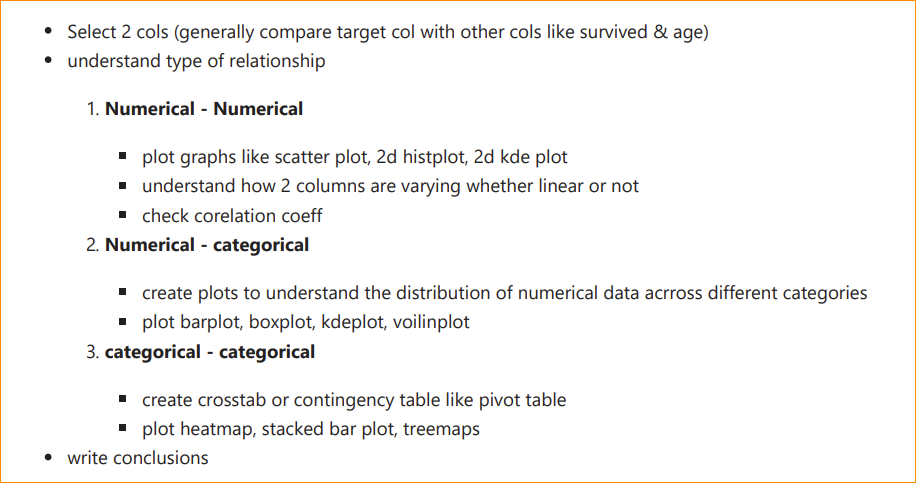

In [27]:
# target: price, we'll compare all other with target    

In [28]:
df.columns

Index(['productName', 'price', 'rating', 'specScore', 'features', 'brand',
       'processor', 'storage', 'cores', 'ram', 'screen_size', 'Warranty', 'OS',
       'graphics', 'storage_type', 'ram_type', 'resolution',
       'graphics_category', 'resolution_category'],
      dtype='object')

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

def bivariate_analysis_num_num(df, col1, col2):
    """
    Perform bivariate analysis between two numerical columns of a DataFrame.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    col1 (str): Name of the first numerical column.
    col2 (str): Name of the second numerical column.
    
    Returns:
    None
    """
    # Check if columns exist
    if col1 not in df.columns or col2 not in df.columns:
        raise ValueError(f"Columns '{col1}' or '{col2}' do not exist in the DataFrame")
    
    # Extract columns
    x = df[col1]
    y = df[col2]
    
    # Scatter Plot
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    plt.scatter(x, y, alpha=0.5)
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    
    # 2D Histogram Plot
    plt.subplot(2, 2, 2)
    plt.hist2d(x, y, bins=30, cmap='Blues', alpha=0.7)
    plt.colorbar(label='Frequency')
    plt.title(f'2D Histogram of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    
    # KDE Plot
    plt.subplot(2, 2, 3)
    sns.kdeplot(x, y, cmap='Blues', fill=True)
    plt.title(f'KDE Plot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    
    # Correlation Coefficient
    correlation, _ = pearsonr(x, y)
    plt.subplot(2, 2, 4)
    plt.axis('off')
    plt.text(0.1, 0.5, f'Pearson Correlation Coefficient:\n{correlation:.2f}', fontsize=15)
    plt.title('Correlation Analysis')
    
    plt.tight_layout()
    plt.show()

C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


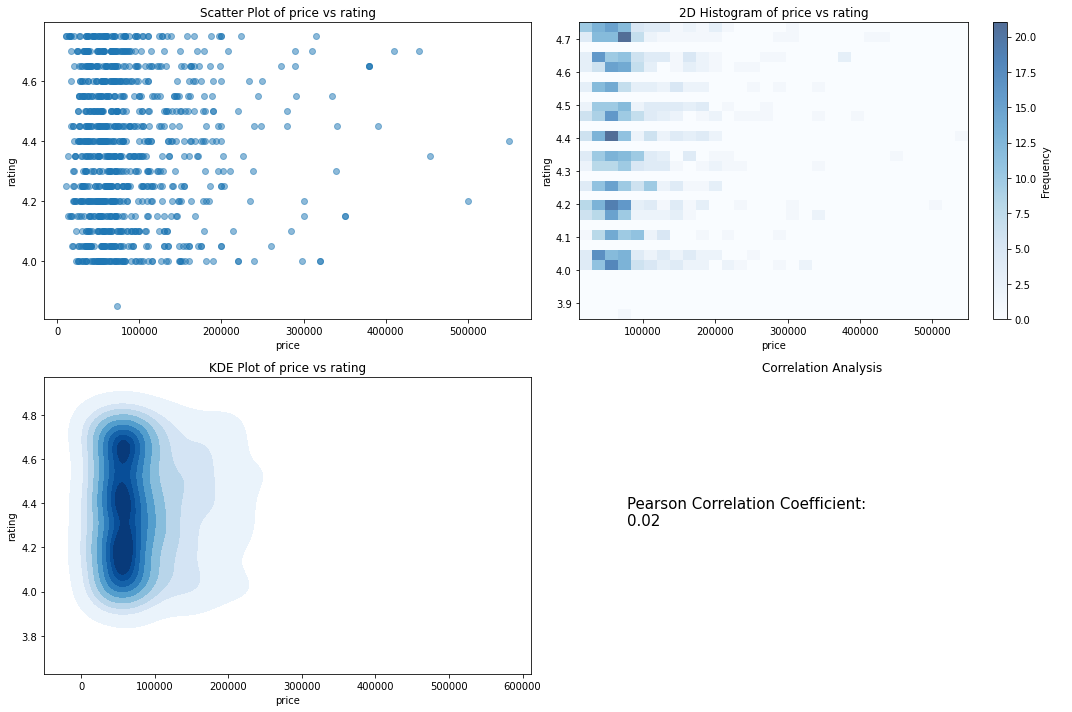

In [30]:
bivariate_analysis_num_num(df, 'price', 'rating')

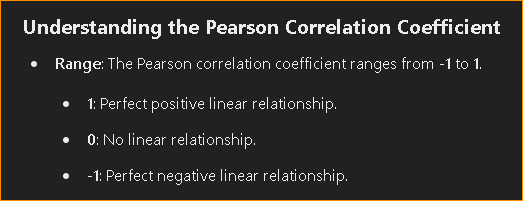

### price & rating have very weak linear relation means change in rating doesnt effect price much which means its not a relevant col for prediction of price

C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


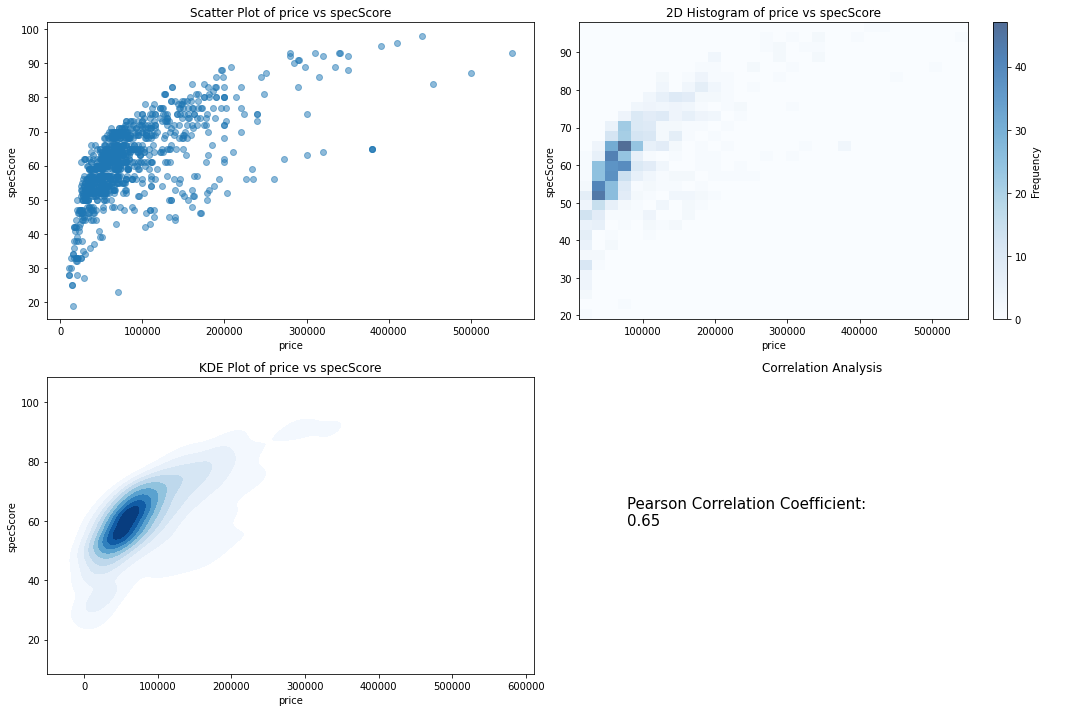

In [31]:
bivariate_analysis_num_num(df, 'price', 'specScore')

### price & specscore have sort of linear relationship

C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


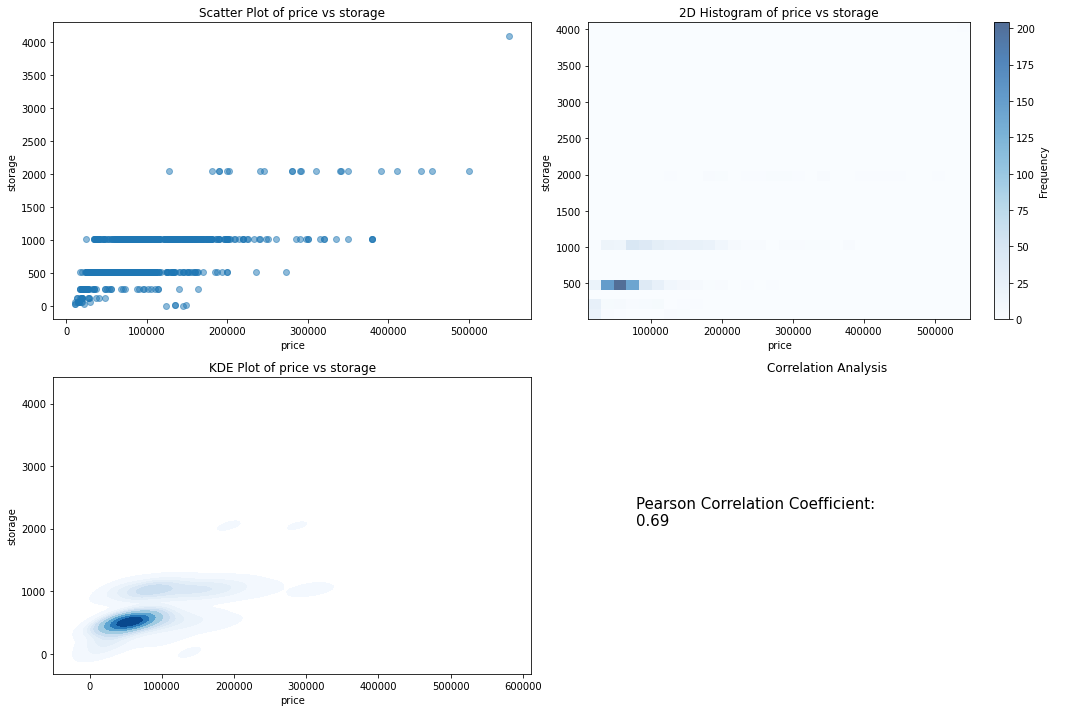

In [32]:
bivariate_analysis_num_num(df, 'price', 'storage')

### price & storage have sort of linear relationship

C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


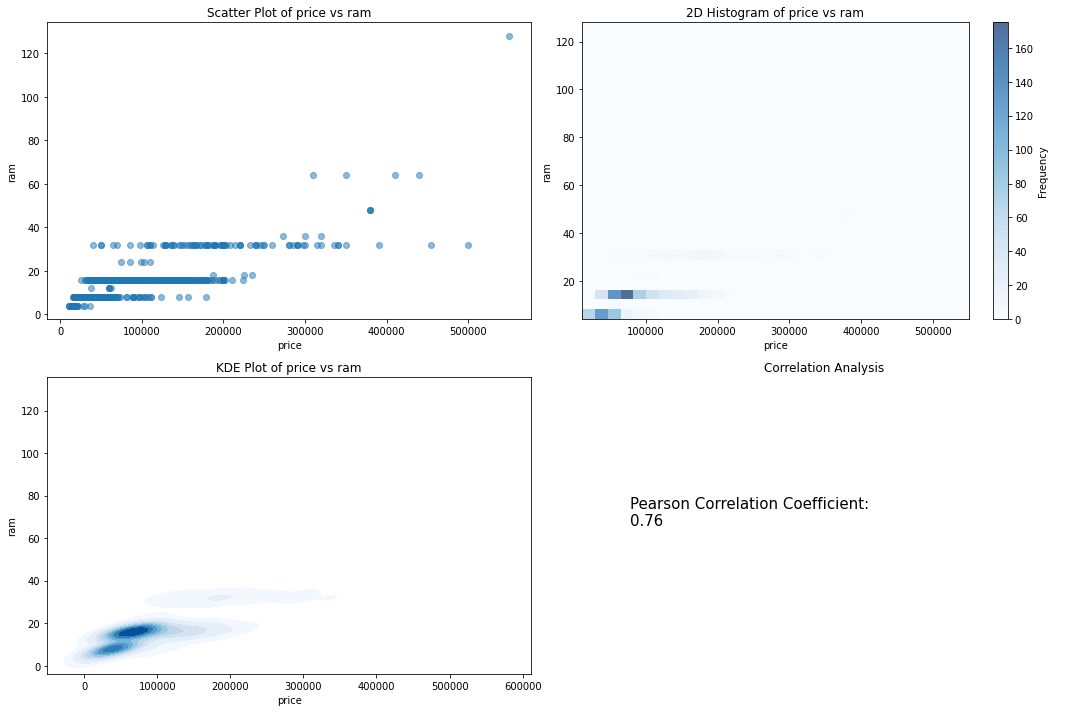

In [33]:
bivariate_analysis_num_num(df, 'price', 'ram')

In [34]:
### ram & price have sort of linear relationship

C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


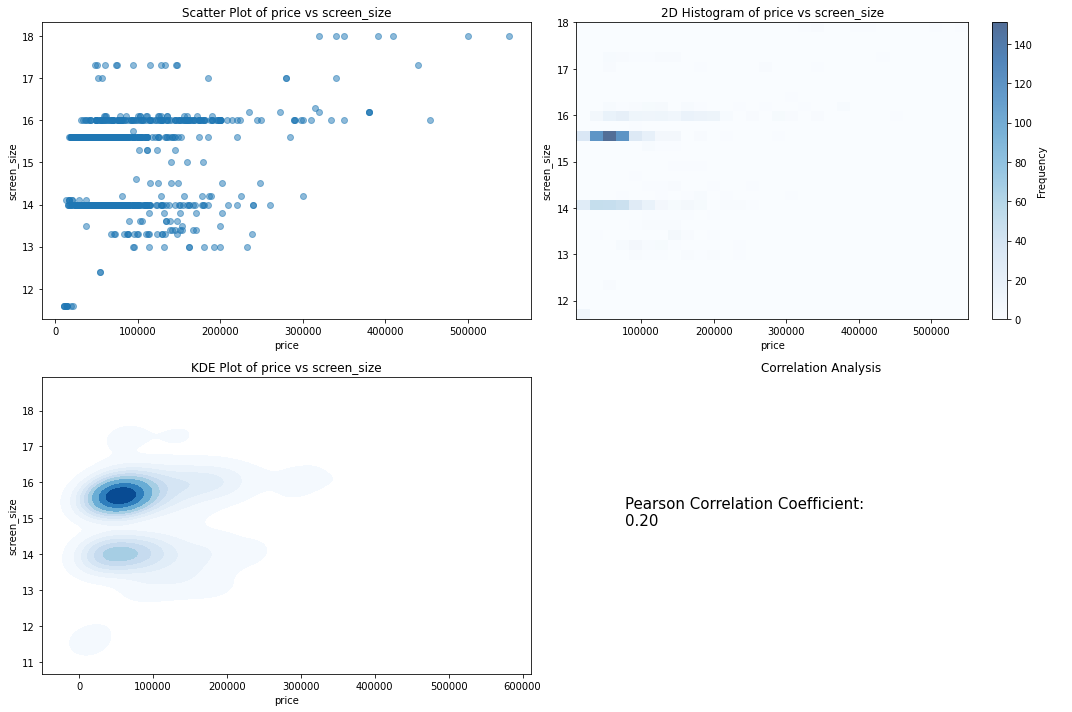

In [35]:
bivariate_analysis_num_num(df, 'price', 'screen_size')

In [36]:
# price & screen size doesnt have linear relationship

C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


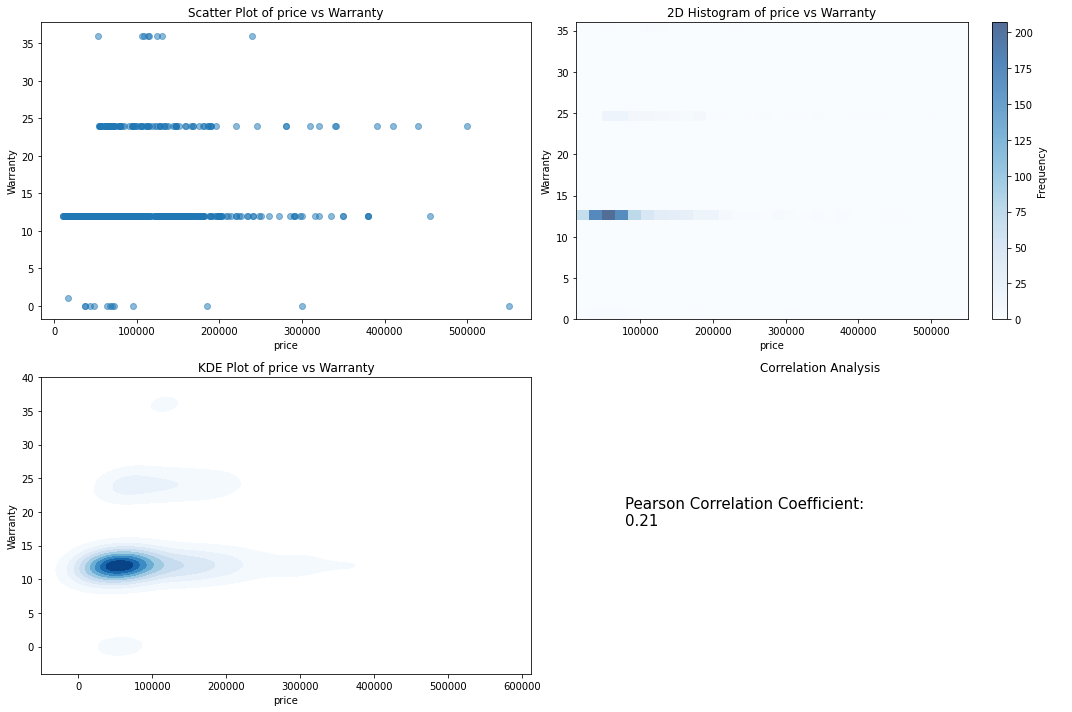

In [37]:
bivariate_analysis_num_num(df, 'price', 'Warranty')

In [38]:
# price & warranty doesnt have linear relationship

In [39]:
def bivariate_analysis_num_cat(df, numerical_col, categorical_col):
    """
    Perform bivariate analysis between a numerical and a categorical column.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    numerical_col (str): Name of the numerical column.
    categorical_col (str): Name of the categorical column.
    
    Returns:
    None
    """
    # Check if columns exist
    if numerical_col not in df.columns or categorical_col not in df.columns:
        raise ValueError(f"Columns '{numerical_col}' or '{categorical_col}' do not exist in the DataFrame")

    # Set up the figure and axes
    plt.figure(figsize=(18, 12))

    # Bar Plot (Mean of Numerical Data by Category)
    plt.subplot(2, 2, 1)
    sns.barplot(x=categorical_col, y=numerical_col, data=df, estimator=np.mean, ci=None, palette='viridis')
    plt.title(f'Bar Plot: Mean {numerical_col} by {categorical_col}')
    plt.xlabel(categorical_col)
    plt.ylabel(f'Mean {numerical_col}')
    plt.xticks(rotation=45)

    # Box Plot
    plt.subplot(2, 2, 2)
    sns.boxplot(x=categorical_col, y=numerical_col, data=df, palette='viridis')
    plt.title(f'Box Plot: {numerical_col} by {categorical_col}')
    plt.xlabel(categorical_col)
    plt.ylabel(numerical_col)
    plt.xticks(rotation=45)

    # KDE Plot
    plt.subplot(2, 2, 3)
    sns.kdeplot(data=df, x=numerical_col, hue=categorical_col, common_norm=False, palette='viridis')
    plt.title(f'KDE Plot: {numerical_col} by {categorical_col}')
    plt.xlabel(numerical_col)
    plt.ylabel('Density')

    # Violin Plot
    plt.subplot(2, 2, 4)
    sns.violinplot(x=categorical_col, y=numerical_col, data=df, palette='viridis')
    plt.title(f'Violin Plot: {numerical_col} by {categorical_col}')
    plt.xlabel(categorical_col)
    plt.ylabel(numerical_col)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

In [40]:
df.columns

Index(['productName', 'price', 'rating', 'specScore', 'features', 'brand',
       'processor', 'storage', 'cores', 'ram', 'screen_size', 'Warranty', 'OS',
       'graphics', 'storage_type', 'ram_type', 'resolution',
       'graphics_category', 'resolution_category'],
      dtype='object')

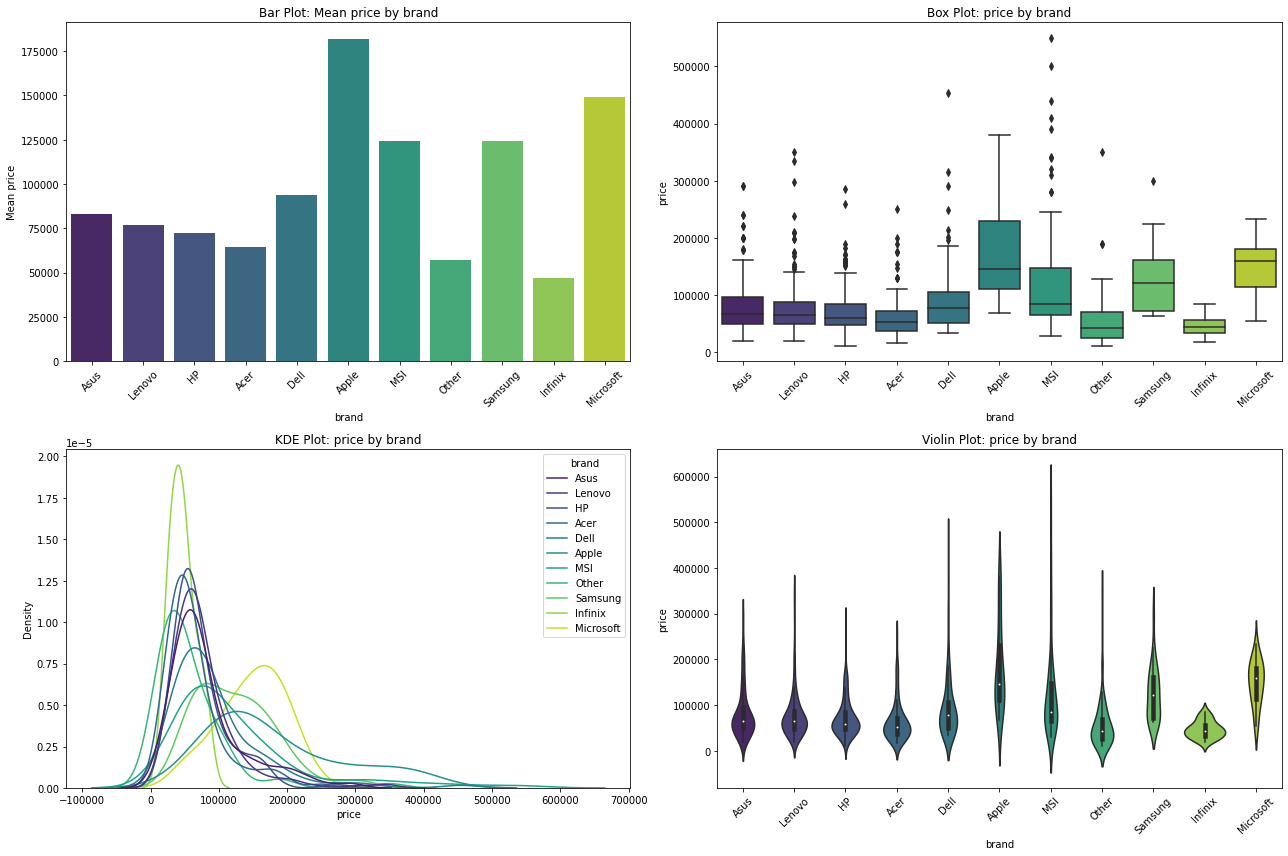

In [41]:
bivariate_analysis_num_cat(df, 'price', 'brand')

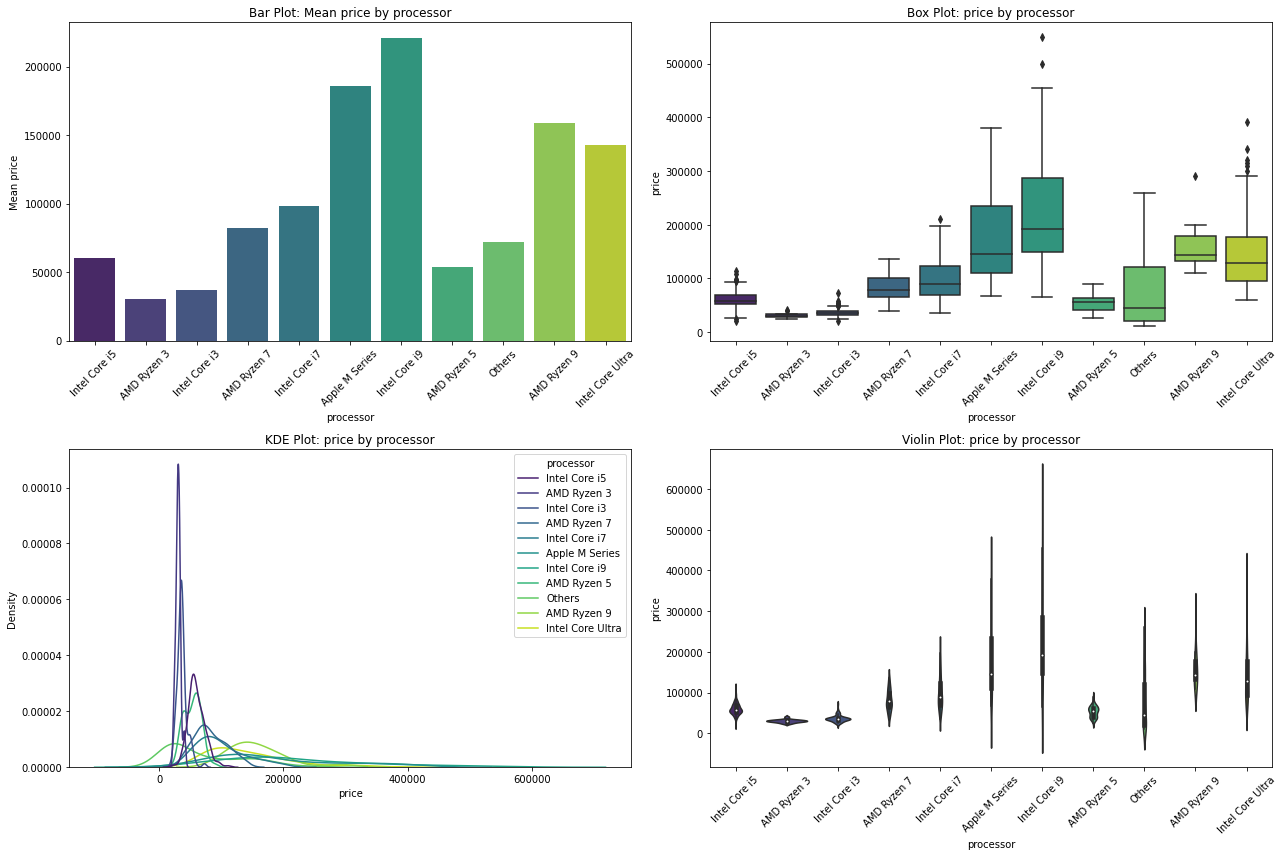

In [42]:
bivariate_analysis_num_cat(df, 'price', 'processor')

C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


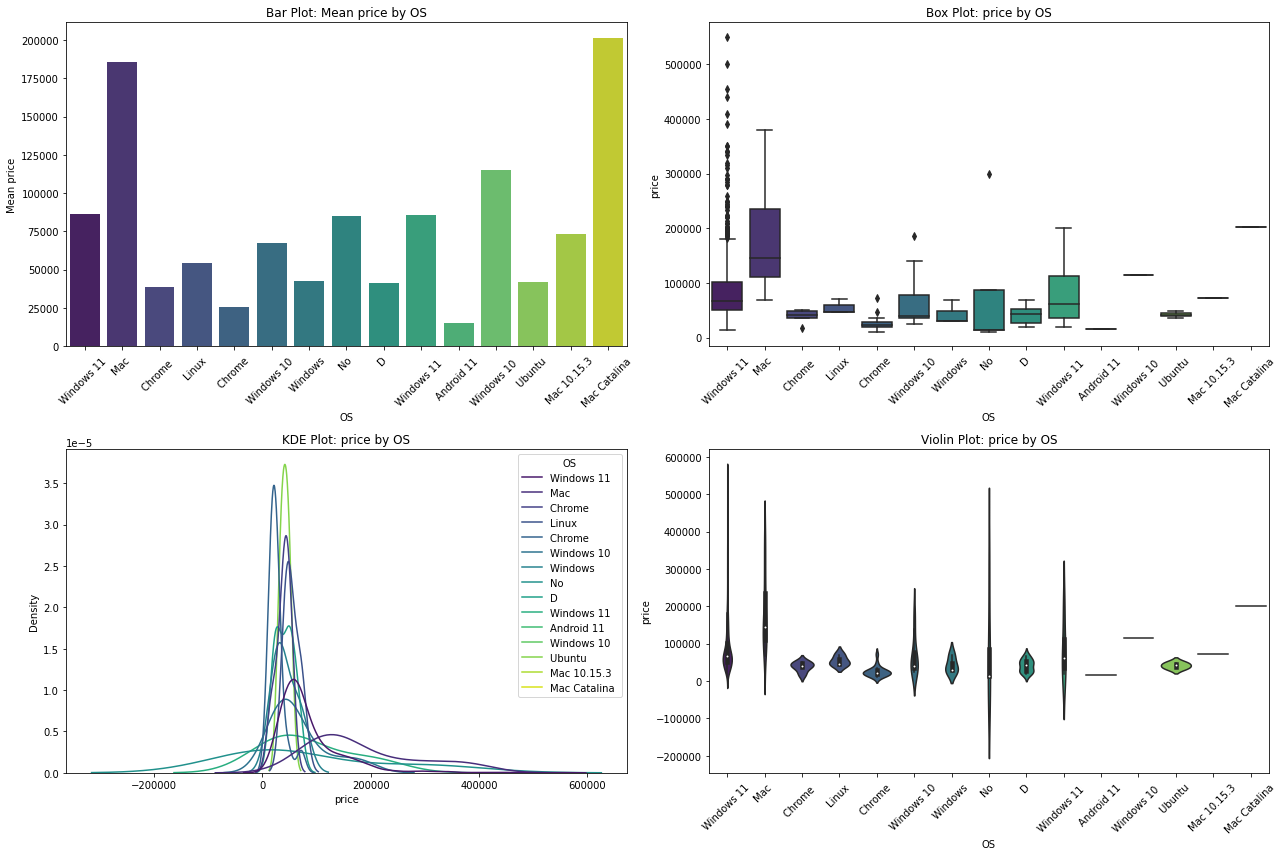

In [43]:
bivariate_analysis_num_cat(df, 'price', 'OS')

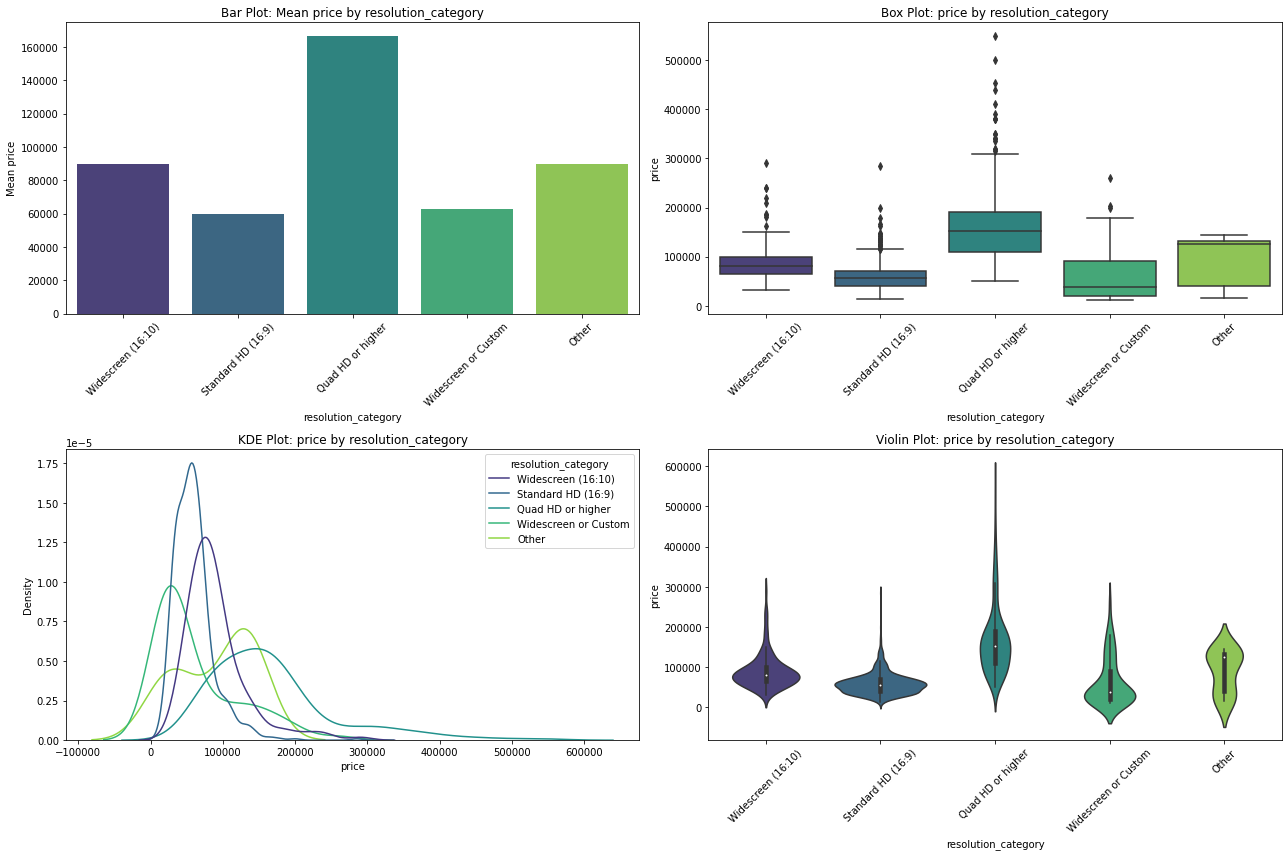

In [44]:
bivariate_analysis_num_cat(df, 'price', 'resolution_category')

In [45]:
#need to make ram type into lesser category

In [46]:
df['ram_type'].value_counts()

 DDR4               431
 DDR5               226
 LPDDR5             114
 LPDDR5X             75
                     46
 LPDDR4X             41
 LPDDR5x             28
 LPDDR4x             17
 LPDDR4              13
 LPDDR5               6
 ‎LPDDR5x             4
 DDR6                 2
 DDR5 SD              2
 DDR4                 2
 Unified Memory       2
 LPDDRx4              2
 DDR3                 2
  DDR4                1
 DDR4-                1
 LPDDR4x              1
 LPDDR3               1
 LPDDR5x              1
Name: ram_type, dtype: int64

In [47]:
ram_type_map = {
    'ddr4': 'DDR4',
    'ddr5': 'DDR5',
    'lpddr5': 'LPDDR5',
    'lpddr5x': 'LPDDR5X',
    'lpddr4x': 'LPDDR4X',
    'lpddr4': 'LPDDR4',
    'ddr6': 'DDR6',
    'unified memory': 'Unified Memory',
    'lpddrx4': 'LPDDRx4',
    'ddr5 sd': 'DDR5 SD',
    'lpddr3': 'LPDDR3',
    'ddr4-': 'DDR4',
    ' ‎lpddr4': 'LPDDR4',
    ' ‎lpddr5x': 'LPDDR5X',
    'ddr4': 'DDR4'  # Correcting similar entries
}

# Clean and apply the mapping
df['ram_type'] = df['ram_type'].str.strip().str.lower()  # Normalize to lowercase and strip extra spaces

In [48]:
df['ram_type'] = df['ram_type'].map(ram_type_map).fillna(df['ram_type'])

In [49]:
df['ram_type'].value_counts()

DDR4              435
DDR5              226
LPDDR5            120
LPDDR5X           104
LPDDR4X            59
                   46
LPDDR4             13
‎lpddr5x            4
DDR6                2
DDR5 SD             2
Unified Memory      2
LPDDRx4             2
ddr3                2
LPDDR3              1
Name: ram_type, dtype: int64

In [50]:
df['ram_type'] = df['ram_type'].str.replace('ddr3', 'DDR3')
df['ram_type'] = df['ram_type'].str.replace('lpddr5x', 'LPDDR5X')
df['ram_type'] = df['ram_type'].str.replace('lpddr4', 'LPDDR4')

In [51]:
df['ram_type'].value_counts()

DDR4              435
DDR5              226
LPDDR5            120
LPDDR5X           104
LPDDR4X            59
                   46
LPDDR4             13
‎LPDDR5X            4
DDR6                2
DDR5 SD             2
Unified Memory      2
LPDDRx4             2
DDR3                2
LPDDR3              1
Name: ram_type, dtype: int64

C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\iampr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


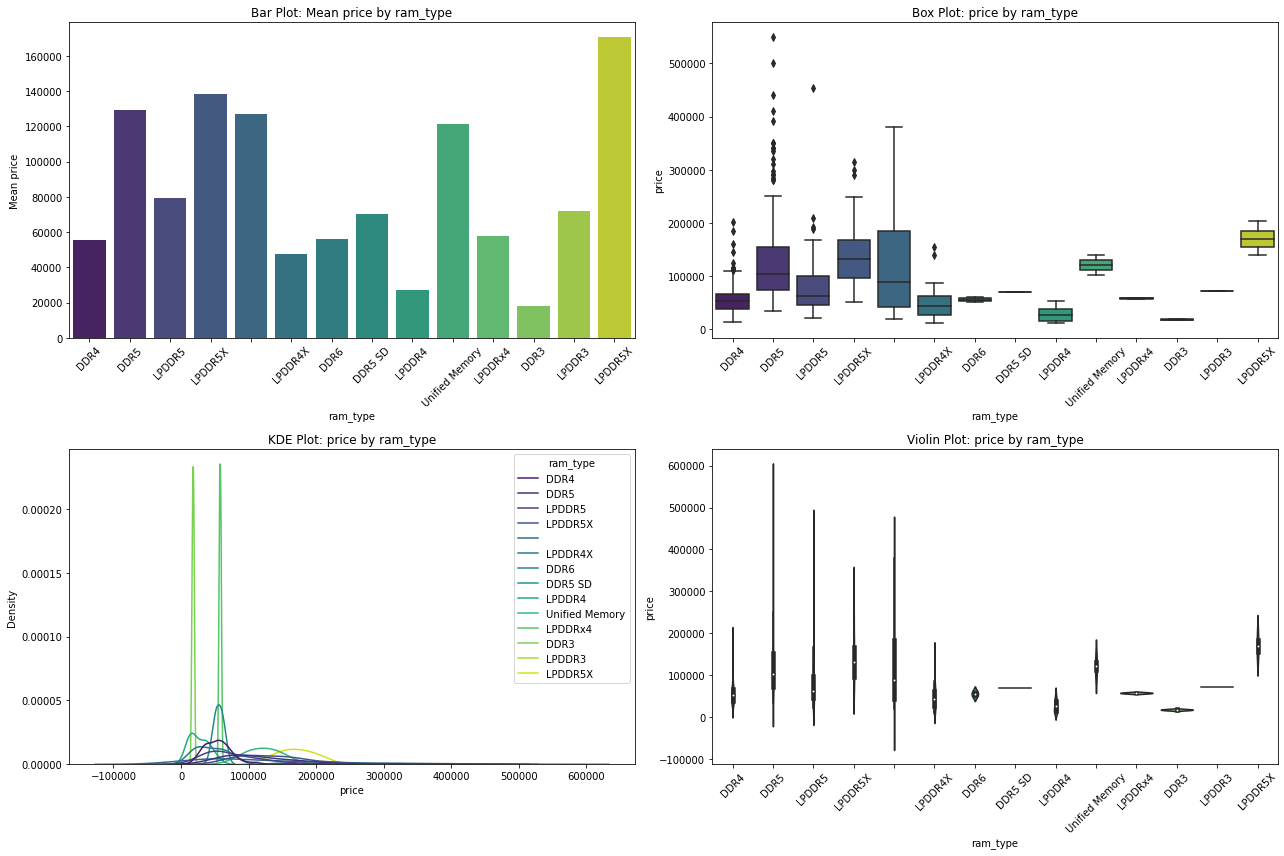

In [52]:
bivariate_analysis_num_cat(df, 'price', 'ram_type')

In [53]:
df.sample(5)

,productName,price,rating,specScore,features,brand,processor,storage,cores,ram,screen_size,Warranty,OS,graphics,storage_type,ram_type,resolution,graphics_category,resolution_category
556,Apple MacBook Air 15 2023 Laptop (Apple M2/ 8GB/ 256GB SSD/ MacOS),101990,4.55,52,"['Apple M2', 'Octa Core (4P + 4E)', '8\u2009GB DDR4 RAM', '256\u2009GB SSD', '10-Core GPU', '15.3\u2009inches, 2880\u2009x\u20091864\u2009pixels', 'Mac OS', '1 Year Warranty']",Apple,Apple M Series,256,No,8,15.3,12,Mac,10-Core GPU,SSD,DDR4,2880 x 1864,Other/Unknown,Quad HD or higher
716,Lenovo IdeaPad Slim 3 14IRU8 82X6004GIN Laptop (13th Gen Core i3/ 8GB/ 512GB SSD/ Win11),39990,4.35,44,"['13th Gen Intel Core i3 1305U', '5 Cores (1P + 4E), 6 Threads', '8\u2009GB LPDDR5 RAM', '512\u2009GB SSD', 'Integrated Intel UHD Graphics', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Lenovo,Intel Core i3,512,5,8,15.6,12,Windows 11,intel uhd graphics,SSD,LPDDR5,1920 x 1080,Intel,Standard HD (16:9)
443,Lenovo IdeaPad Slim 3 83EM0026IN Laptop (13th Gen Core i5/ 16GB/ 512GB SSD/ Win11),58390,4.20,54,"['13th Gen Intel Core i5 13420H', 'Octa Core (4P + 4E), 12 Threads', '16\u2009GB LPDDR5 RAM', '512\u2009GB SSD', 'Integrated Intel UHD Graphics', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",Lenovo,Intel Core i5,512,No,16,15.6,12,Windows 11,intel uhd graphics,SSD,LPDDR5,1920 x 1080,Intel,Standard HD (16:9)
124,HP Pavilion 15s-fq5190TU Laptop (12th Gen Core i7/ 16GB/ 512GB SSD/ Win11 Home),66490,4.20,61,"['12th Gen Intel Core i7 1255U', '10 Cores (2P + 8E), 12 Threads', '16\u2009GB DDR4 RAM', '512\u2009GB SSD', 'Intel Iris Xe', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']",HP,Intel Core i7,512,10,16,15.6,12,Windows 11,intel iris xe,SSD,DDR4,1920 x 1080,Intel,Standard HD (16:9)
644,Asus ROG Flow X13 GV301QH-K5459TS Gaming Laptop (AMD Ryzen 9/ 32GB/ 1TB SSD/ Win10 Home/ 4GB Graph),139890,4.20,79,"['5th Gen AMD Ryzen 9 5980HS', 'Octa Core, 16 Threads', '32\u2009GB LPDDR4X RAM', '1\u2009TB SSD', '4\u2009GB NVIDIA GeForce GTX 1650', '13.4\u2009inches, 3840\u2009x\u20092400\u2009pixels, Touch Screen', 'Windows 10 OS', '1 Year Warranty']",Asus,AMD Ryzen 9,1024,No,32,13.4,12,Windows 10,NVIDIA,SSD,LPDDR4X,3840 x 2400,Other/Unknown,Quad HD or higher


### NO need of feature engineering since we have already done it at the time of data cleaning

## Multivariate Analysis

In [54]:
df.corr()['price']

price          1.000000
rating         0.018456
specScore      0.653632
storage        0.685308
ram            0.761372
screen_size    0.197907
Warranty       0.206037
Name: price, dtype: float64

<AxesSubplot:>

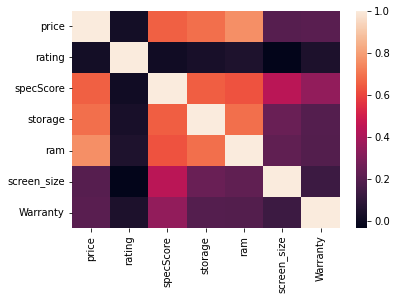

In [56]:
sns.heatmap(df.corr())

In [57]:
## seems to be no multicoplinarity but need to check via ml algorithms & other techniques
## price have good relation with ram storage & spec score

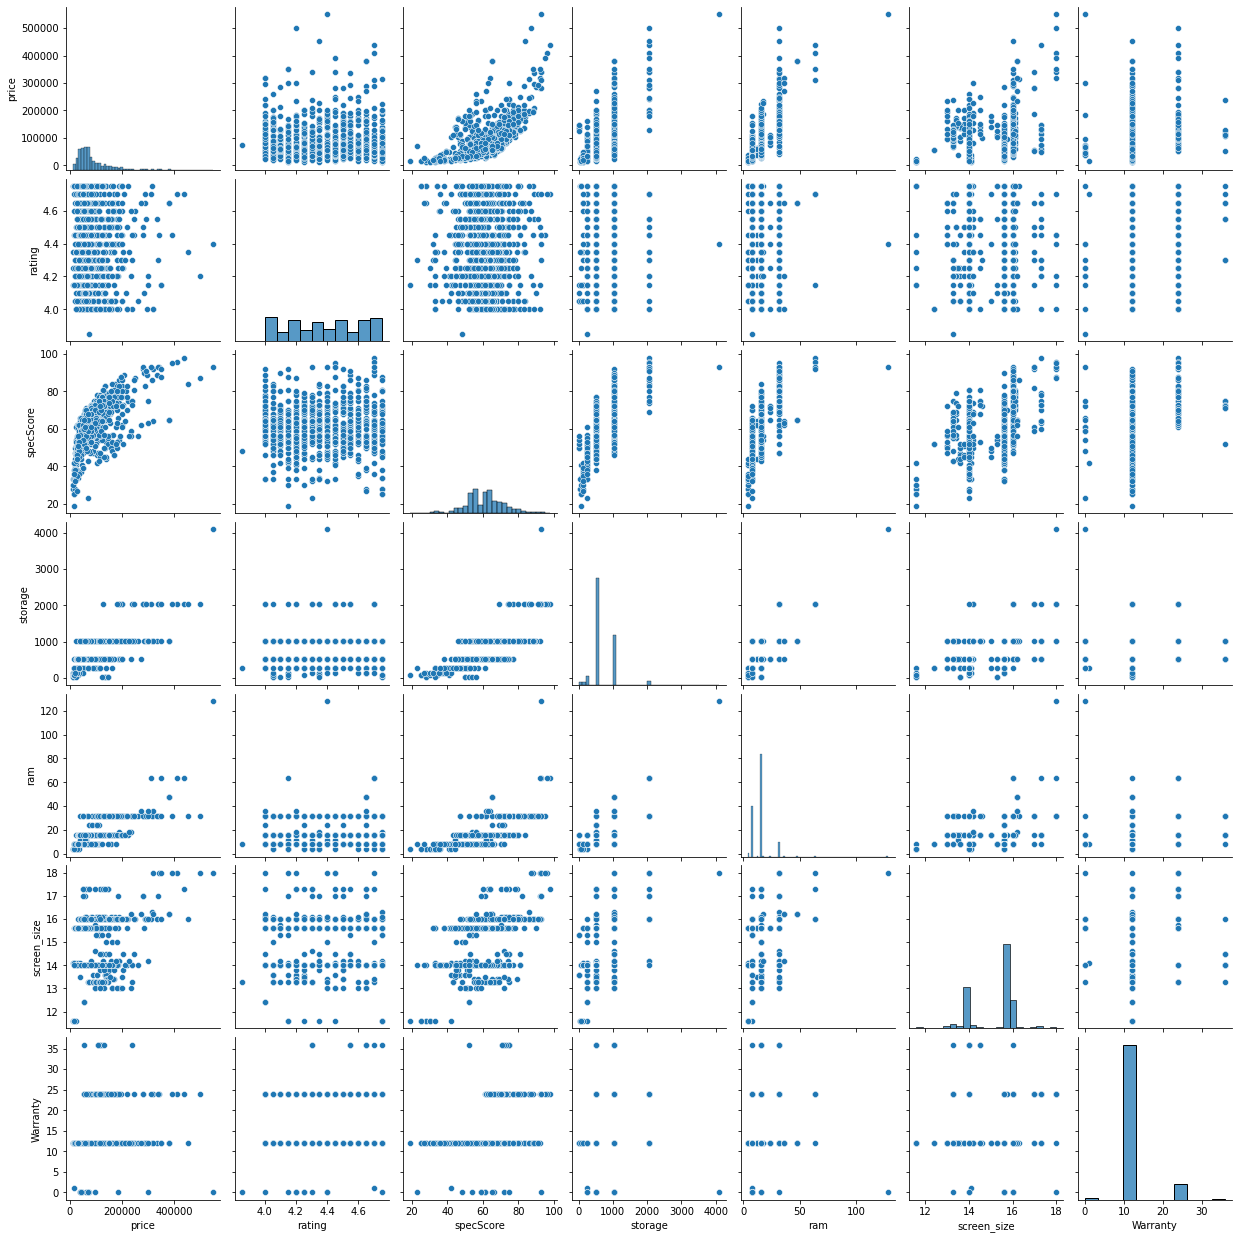

In [59]:
sns.pairplot(df)

In [60]:
df.to_excel("cleaned_smartprix_laptop3.xlsx", index=False)